In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# %pip install xlrd --upgrade?
# !pip install pandas==1.3.5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from scipy.stats import norm
from scipy import stats

sns.set(rc={'figure.figsize':(11.7,8.27)})
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27




import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PCOS/WithoutInfertility/PCOS_WithoutInfertility.csv')

df.drop('Unnamed: 42', axis=1, inplace=True)
df.drop('Patient File No.', axis=1, inplace=True)
df.drop('Sl. No', axis=1, inplace=True)
df

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.500000,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.300000,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.400000,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.200000,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1   Age (yrs)              541 non-null    int64  
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    float64
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marraige Status (Yrs)  540 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No. of aborptions      541 non-null    int64  
 14  FSH(mIU/mL)            541 non-null    float64
 15  LH(mIU

In [ ]:
df['Fast food (Y/N)'] = df['Fast food (Y/N)'].fillna(0).astype(np.int64)

In [ ]:
df['Marraige Status (Yrs)'] = df['Marraige Status (Yrs)'].fillna(0).astype(np.int64)
# df['BMI'] = df['BMI'].fillna(0).astype(np.int64)


In [ ]:
pd.set_option('display.max_columns', None)
df

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.300000,15,78,22,10.48,2,5,7,0,0,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.921163,15,74,20,11.70,2,5,11,1,0,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.270891,11,72,18,11.80,2,5,10,1,0,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.674945,13,72,20,12.00,2,5,4,0,0,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.060954,11,72,18,10.00,2,5,1,1,0,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.500000,17,72,16,11.00,2,5,8,0,1,10.06,1.81,5.558011,28,26,0.928571,1.11,1.70,5.30,36.6,0.25,92.0,0,0,0,0,0,0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.300000,15,72,18,10.80,2,5,4,1,1,5.07,2.84,1.785211,34,32,0.941176,2.05,5.60,21.09,23.0,0.25,108.0,1,0,0,0,0,0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.400000,13,74,20,10.80,2,6,8,0,0,11.96,2.78,4.302158,30,28,0.933333,2.87,3.70,96.41,22.5,0.25,92.0,0,0,0,0,0,0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.200000,15,74,20,12.00,4,2,2,0,0,4.40,4.33,1.016166,28,26,0.928571,2.50,5.20,38.89,22.4,0.25,115.0,0,0,0,0,1,0,0,110,70,7,6,18.0,16.0,11.5


In [ ]:
for col in df.columns:
  print(col)
  print(df[col].value_counts(sort=True))

PCOS (Y/N)
0    364
1    177
Name: PCOS (Y/N), dtype: int64
Age (yrs)
28    45
32    44
35    37
30    37
27    35
29    34
31    33
36    33
26    32
34    29
33    25
38    20
25    18
23    18
40    15
24    15
37    15
41     9
39     9
22     8
20     6
42     6
45     4
44     3
21     3
43     3
47     3
48     1
46     1
Name: Age (yrs), dtype: int64
Weight (Kg)
60.0    36
50.0    34
52.0    27
65.0    25
56.0    22
        ..
56.4     1
53.4     1
68.6     1
64.3     1
63.2     1
Name: Weight (Kg), Length: 117, dtype: int64
Height(Cm)
158.000    67
152.000    66
150.000    46
154.000    38
155.000    27
161.000    24
160.000    24
162.000    21
156.000    21
153.000    19
148.000    17
165.000    17
159.000    16
163.000    14
164.000    13
157.000    13
158.496    11
151.000     9
145.000     6
170.000     6
164.592     5
149.000     5
161.544     4
168.000     4
146.000     4
155.448     3
147.000     3
173.000     3
164.500     3
167.000     2
170.688     2
144.000     2
15

In [ ]:
categ_cols = ['Blood Group', 'PCOS (Y/N)', 'Cycle(R/I)','Pregnant(Y/N)','Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)','Hair loss(Y/N)','Pimples(Y/N)','Fast food (Y/N)','Reg.Exercise(Y/N)']
cont_cols = list(set(df.columns) - set(df[categ_cols]))
print(cont_cols)
print(categ_cols)

['BP _Diastolic (mmHg)', 'Marraige Status (Yrs)', 'No. of aborptions', 'Waist(inch)', 'PRG(ng/mL)', 'Waist:Hip Ratio', 'Avg. F size (R) (mm)', 'Pulse rate(bpm)', 'Vit D3 (ng/mL)', 'Age (yrs)', 'Cycle length(days)', 'AMH(ng/mL)', 'RBS(mg/dl)', 'Height(Cm)', 'Follicle No. (R)', 'LH(mIU/mL)', 'Avg. F size (L) (mm)', 'Endometrium (mm)', 'TSH (mIU/L)', 'Follicle No. (L)', 'FSH(mIU/mL)', 'BMI', 'BP _Systolic (mmHg)', 'PRL(ng/mL)', 'Hip(inch)', 'Weight (Kg)', 'Hb(g/dl)', 'FSH/LH', 'RR (breaths/min)']
['Blood Group', 'PCOS (Y/N)', 'Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']


In [ ]:
for col in categ_cols:
  print(col)
  print(df[col].value_counts())

Blood Group
15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: Blood Group, dtype: int64
PCOS (Y/N)
0    364
1    177
Name: PCOS (Y/N), dtype: int64
Cycle(R/I)
2    390
4    150
5      1
Name: Cycle(R/I), dtype: int64
Pregnant(Y/N)
0    335
1    206
Name: Pregnant(Y/N), dtype: int64
Weight gain(Y/N)
0    337
1    204
Name: Weight gain(Y/N), dtype: int64
hair growth(Y/N)
0    393
1    148
Name: hair growth(Y/N), dtype: int64
Skin darkening (Y/N)
0    375
1    166
Name: Skin darkening (Y/N), dtype: int64
Hair loss(Y/N)
0    296
1    245
Name: Hair loss(Y/N), dtype: int64
Pimples(Y/N)
0    276
1    265
Name: Pimples(Y/N), dtype: int64
Fast food (Y/N)
1    278
0    263
Name: Fast food (Y/N), dtype: int64
Reg.Exercise(Y/N)
0    407
1    134
Name: Reg.Exercise(Y/N), dtype: int64


In [ ]:
# display(df[categ_cols].describe().T)
# display(df[cont_cols].describe().T)

In [ ]:
# reprezentare grafica a datelor

# i = 0
# j = 0
# ncol = 5
# nrow = 14
# all_cols = df.columns.drop('PCOS (Y/N)')

# fig,axes=plt.subplots(nrows=nrow,ncols=ncol,figsize=(20,40))

# for col in all_cols:
#   if col in categ_cols:
#     sns.countplot(x=col, data=df, ax=axes[i, j])
#   elif col in cont_cols:
#     sns.distplot(df[col], ax=axes[i, j])
#     if j < ncol-1:
#       j += 1
#     else:
#       j = 0
#       if i < nrow-1:
#         i += 1
#       else:
#         i = 0
#     sns.boxplot(df[col], ax=axes[i, j])
#   if j < ncol-1:
#     j += 1
#   else:
#     j = 0
#     if i < nrow-1:
#       i += 1
#     else:
#       i = 0
# print(all_cols)
# print(categ_cols)
# print(cont_cols)
# plt.show()

In [ ]:
df['PCOS (Y/N)_val'] = df['PCOS (Y/N)'].replace({0 : 'No', 1: 'Yes'})

In [ ]:
def plot_var(df, col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5,5), dpi=40)
    
    # Plot without outcome
    if continuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='PCOS (Y/N)_val', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by PCOS')
    else:
        charge_off_rates = df.groupby(col_name)['PCOS (Y/N)_val'].value_counts(normalize=True).loc[:,'Yes']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of PCOS disease')
        ax2.set_title('PCOS Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

In [ ]:
# for col in cont_cols:
#   plot_var(df, col, col, continuous=True)

In [ ]:
# sns.pairplot(df[cont_cols],  height=1.5)
# plt.show()

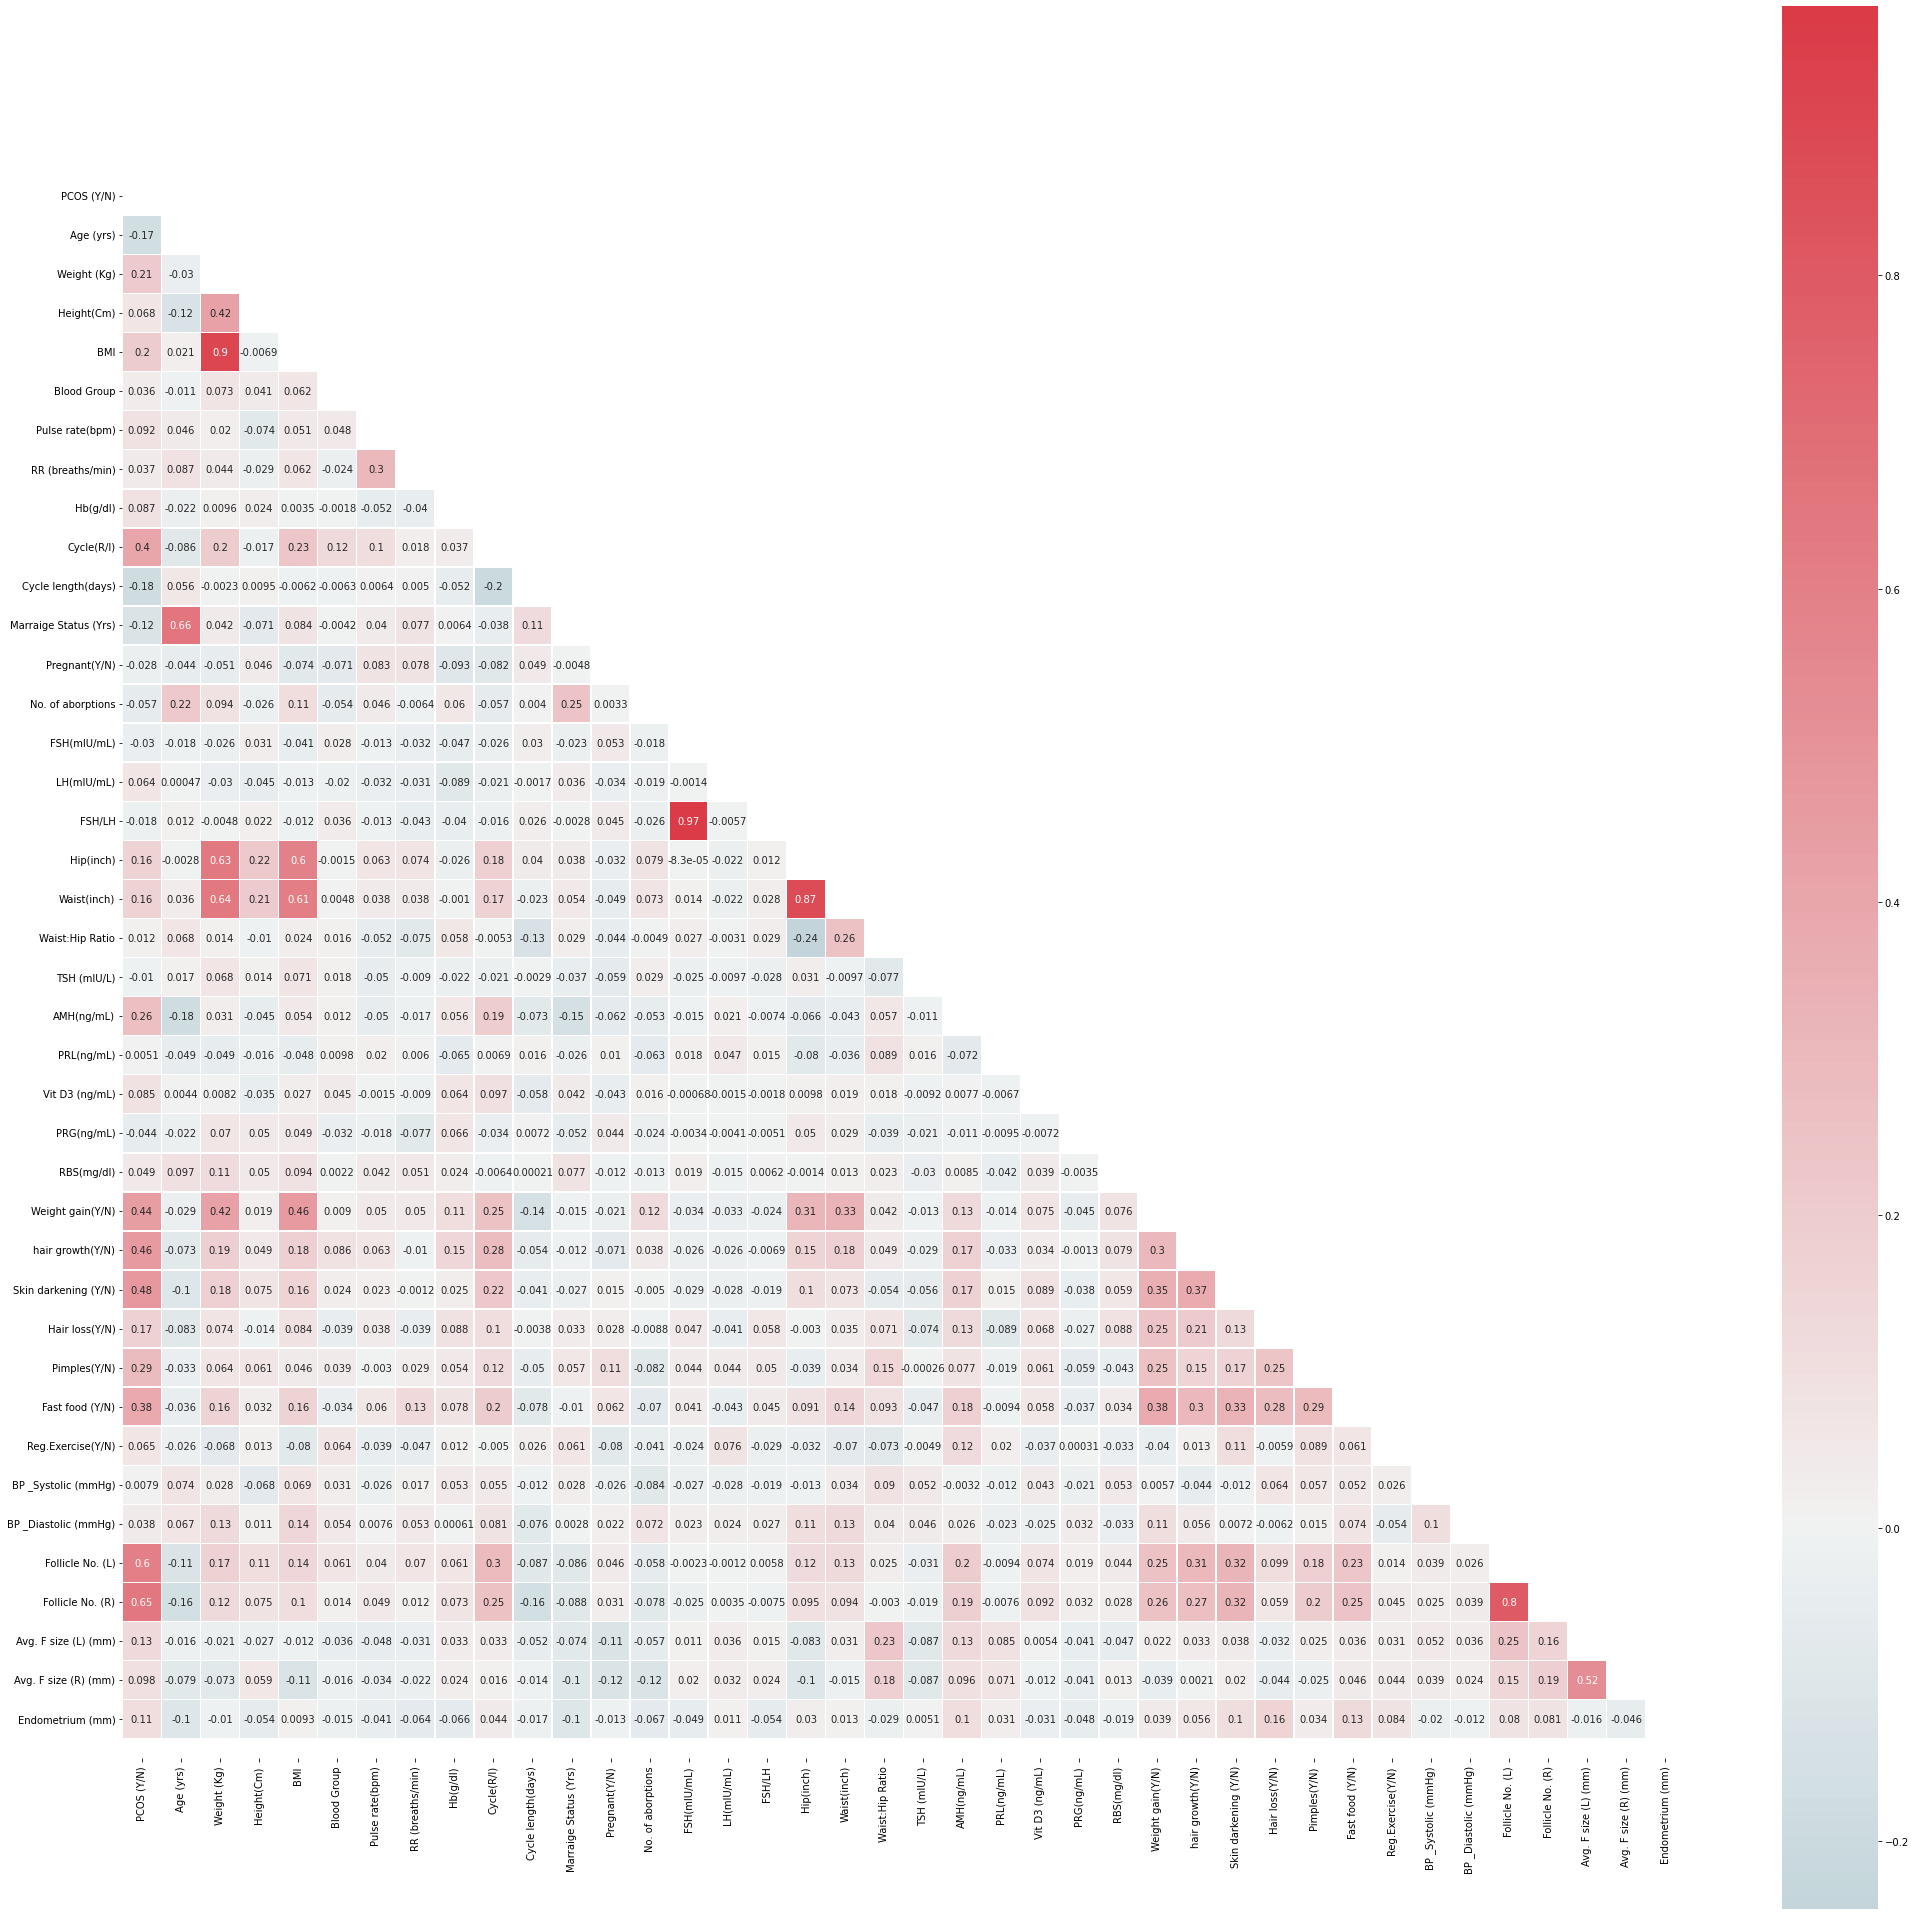

In [ ]:
f, ax = plt.subplots(figsize=(35, 35))
sns.heatmap(df.drop('PCOS (Y/N)_val', 1 ).corr(),mask=np.triu(np.ones_like(df.drop('PCOS (Y/N)_val', 1).corr(),dtype=np.bool)),center=0,annot=True,ax=ax,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),linewidth=.5,square=True)
sns.set(rc = {'figure.figsize':(40,40)})
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)


plt.show()


#### What is the threshold?


## WHAT do you do with low correlation values - eliminate the variable???

### A. corr PCOS big with:   
                  nr follicles (0.65; 0.6)
                  cycle regularity, weight gain, hair growth, skin darkening (0.4)
                  cycle regularity (0.4)
                  fast food  (0.38)
                  AMH  (0.26)
                  BMI, pimples  (0.2)
                  cycle length  - invers prop (-0.18)
                  age           - invers prop  (- 0.17)
                  hair loss     (0.17)
                  
###B. corr PCOS small with:
                 0.003  - PRL
                 0.005  - TSH
                 0.008 - BP systolic
                 0.018 - FSH/LH
                 0.03 - Blood Group, BP. Diastolica, Pregnant
                 0.05 - Abortions nr, RBS
                 0.06 - LH, Height
                 0.08 - Hb



## WHAT to do with high correlatoin between variables - eliminate one of them ???

### 2. Corelations between variables

1. Nr follicles dr -stg  (0.8) 
2. BMI - Weight   (0.9)  (? eliminate  weight? - the BMI has a strong correlation  with PCOS)
3. FSH/LH  - 0.98 -  FSH
4. Waist - 0.87  - Hip
5. Weight - 0.8  - Hip
6. BMI - 0.6 - Hip
7. Age  - 0.6 - Marriage status
8. Follicle size R - 0.5 - Follicle size L
9. Waist  - 0.6 - weight
10. Weight gain  - 0.4 -  weight



In [ ]:
y = df['PCOS (Y/N)']
x = df['Marraige Status (Yrs)']
stdMS = x.std()
print(stdMS)
stdPCOS = y.std()
print(stdPCOS)

4.83284145626404
0.4696148402383716


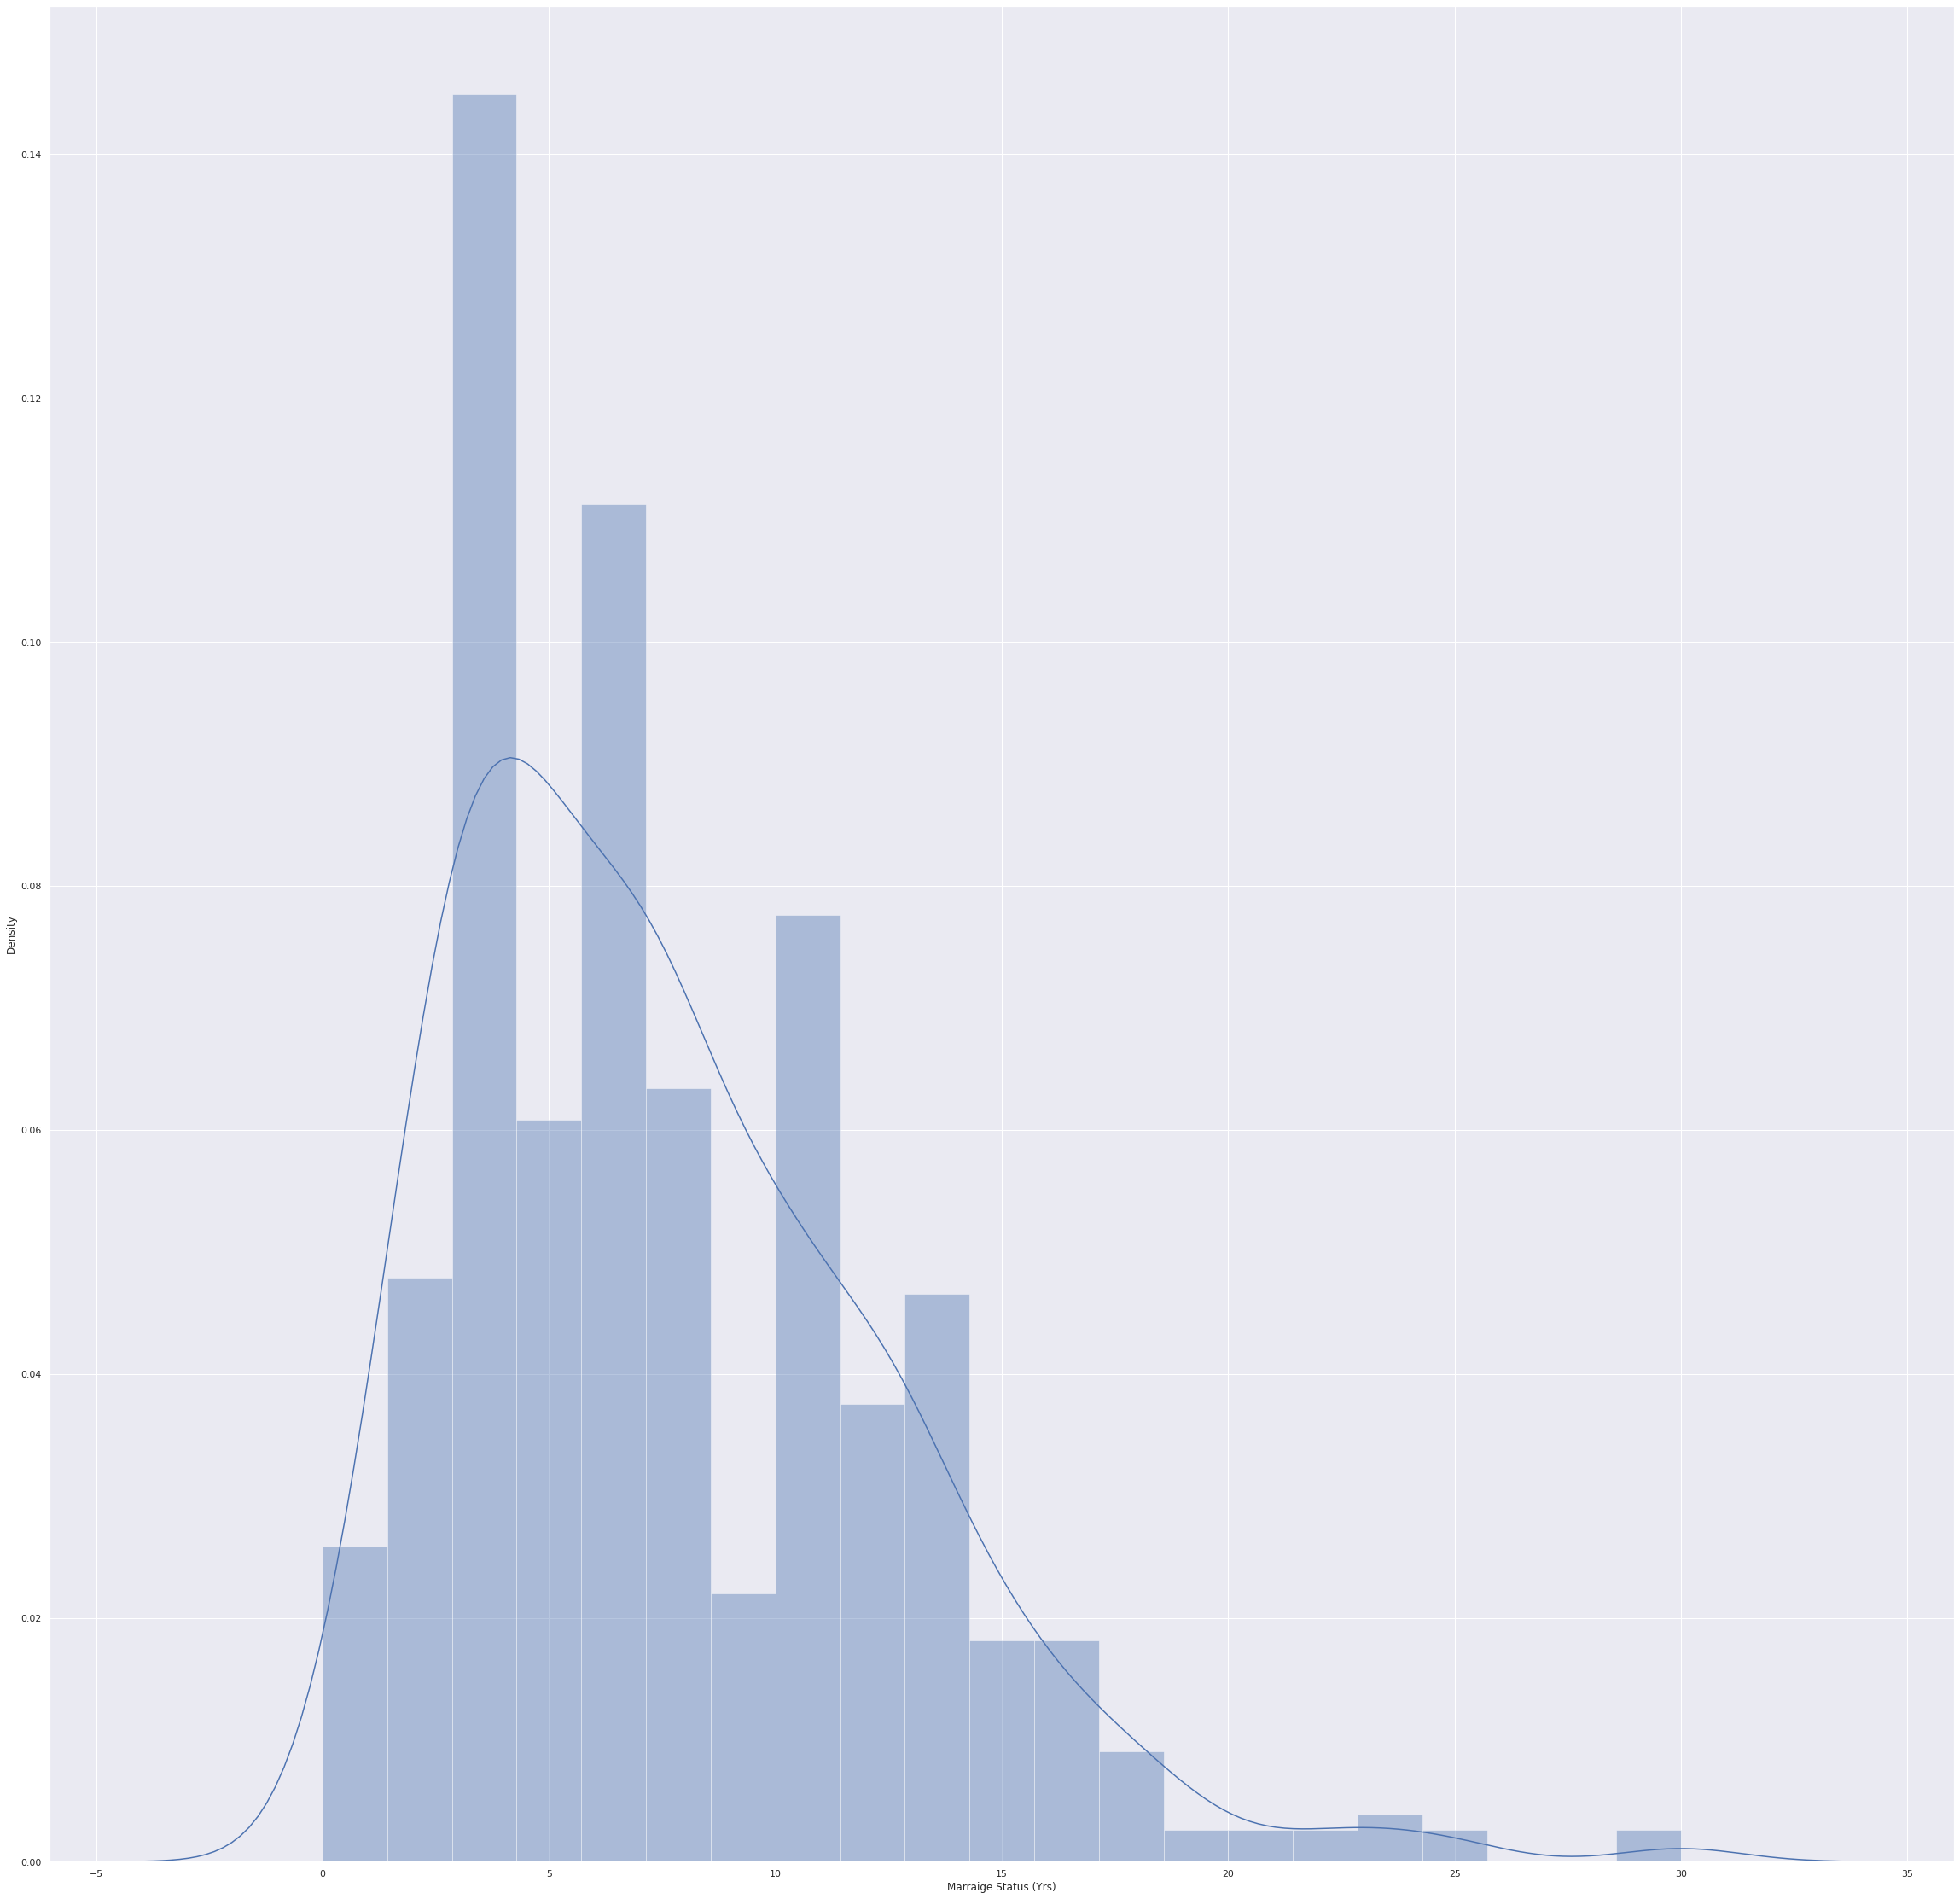

In [ ]:
sp_untransformedMarriageYrs = sns.distplot(df['Marraige Status (Yrs)'])

As the plot shows, our 'Marraige Status (Yrs)' deviates from the normal distribution. It has a longer tail to the right, so we call it a positive skew. In statistics skewness is a measure of asymmetry of the distribution. In addition to skewness, there is also a kurtosis, parameter which refers to the pointedness of a peak in the distribution curve. Both skewness and kurtosis are frequently used together to characterize the distribution of data.

Here, we can simply use the skew() function to calculate our skewness level of the Marraige Status (Yrs).

In [ ]:
print("Skewness: %f" % df['Marraige Status (Yrs)'].skew())

Skewness: 1.122095


The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have ~1.12, so it is considered highly skewed data.

Now, we can try to transform our data, so it looks more normally distributed. We can use the np.log() function from the numpy library to perform log transform. This documentation contains more information about the numpy log transform.

In [ ]:
log_marriageYrs= np.log(df['Marraige Status (Yrs)'])
print(log_marriageYrs)

0      1.945910
1      2.397895
2      2.302585
3      1.386294
4      0.000000
         ...   
536    2.079442
537    1.386294
538    2.079442
539    0.693147
540    0.693147
Name: Marraige Status (Yrs), Length: 541, dtype: float64


In [ ]:
marriageYrsLog = log_marriageYrs.replace([np.inf, -np.inf, -0], 0)
print(marriageYrsLog)

0      1.945910
1      2.397895
2      2.302585
3      1.386294
4      0.000000
         ...   
536    2.079442
537    1.386294
538    2.079442
539    0.693147
540    0.693147
Name: Marraige Status (Yrs), Length: 541, dtype: float64


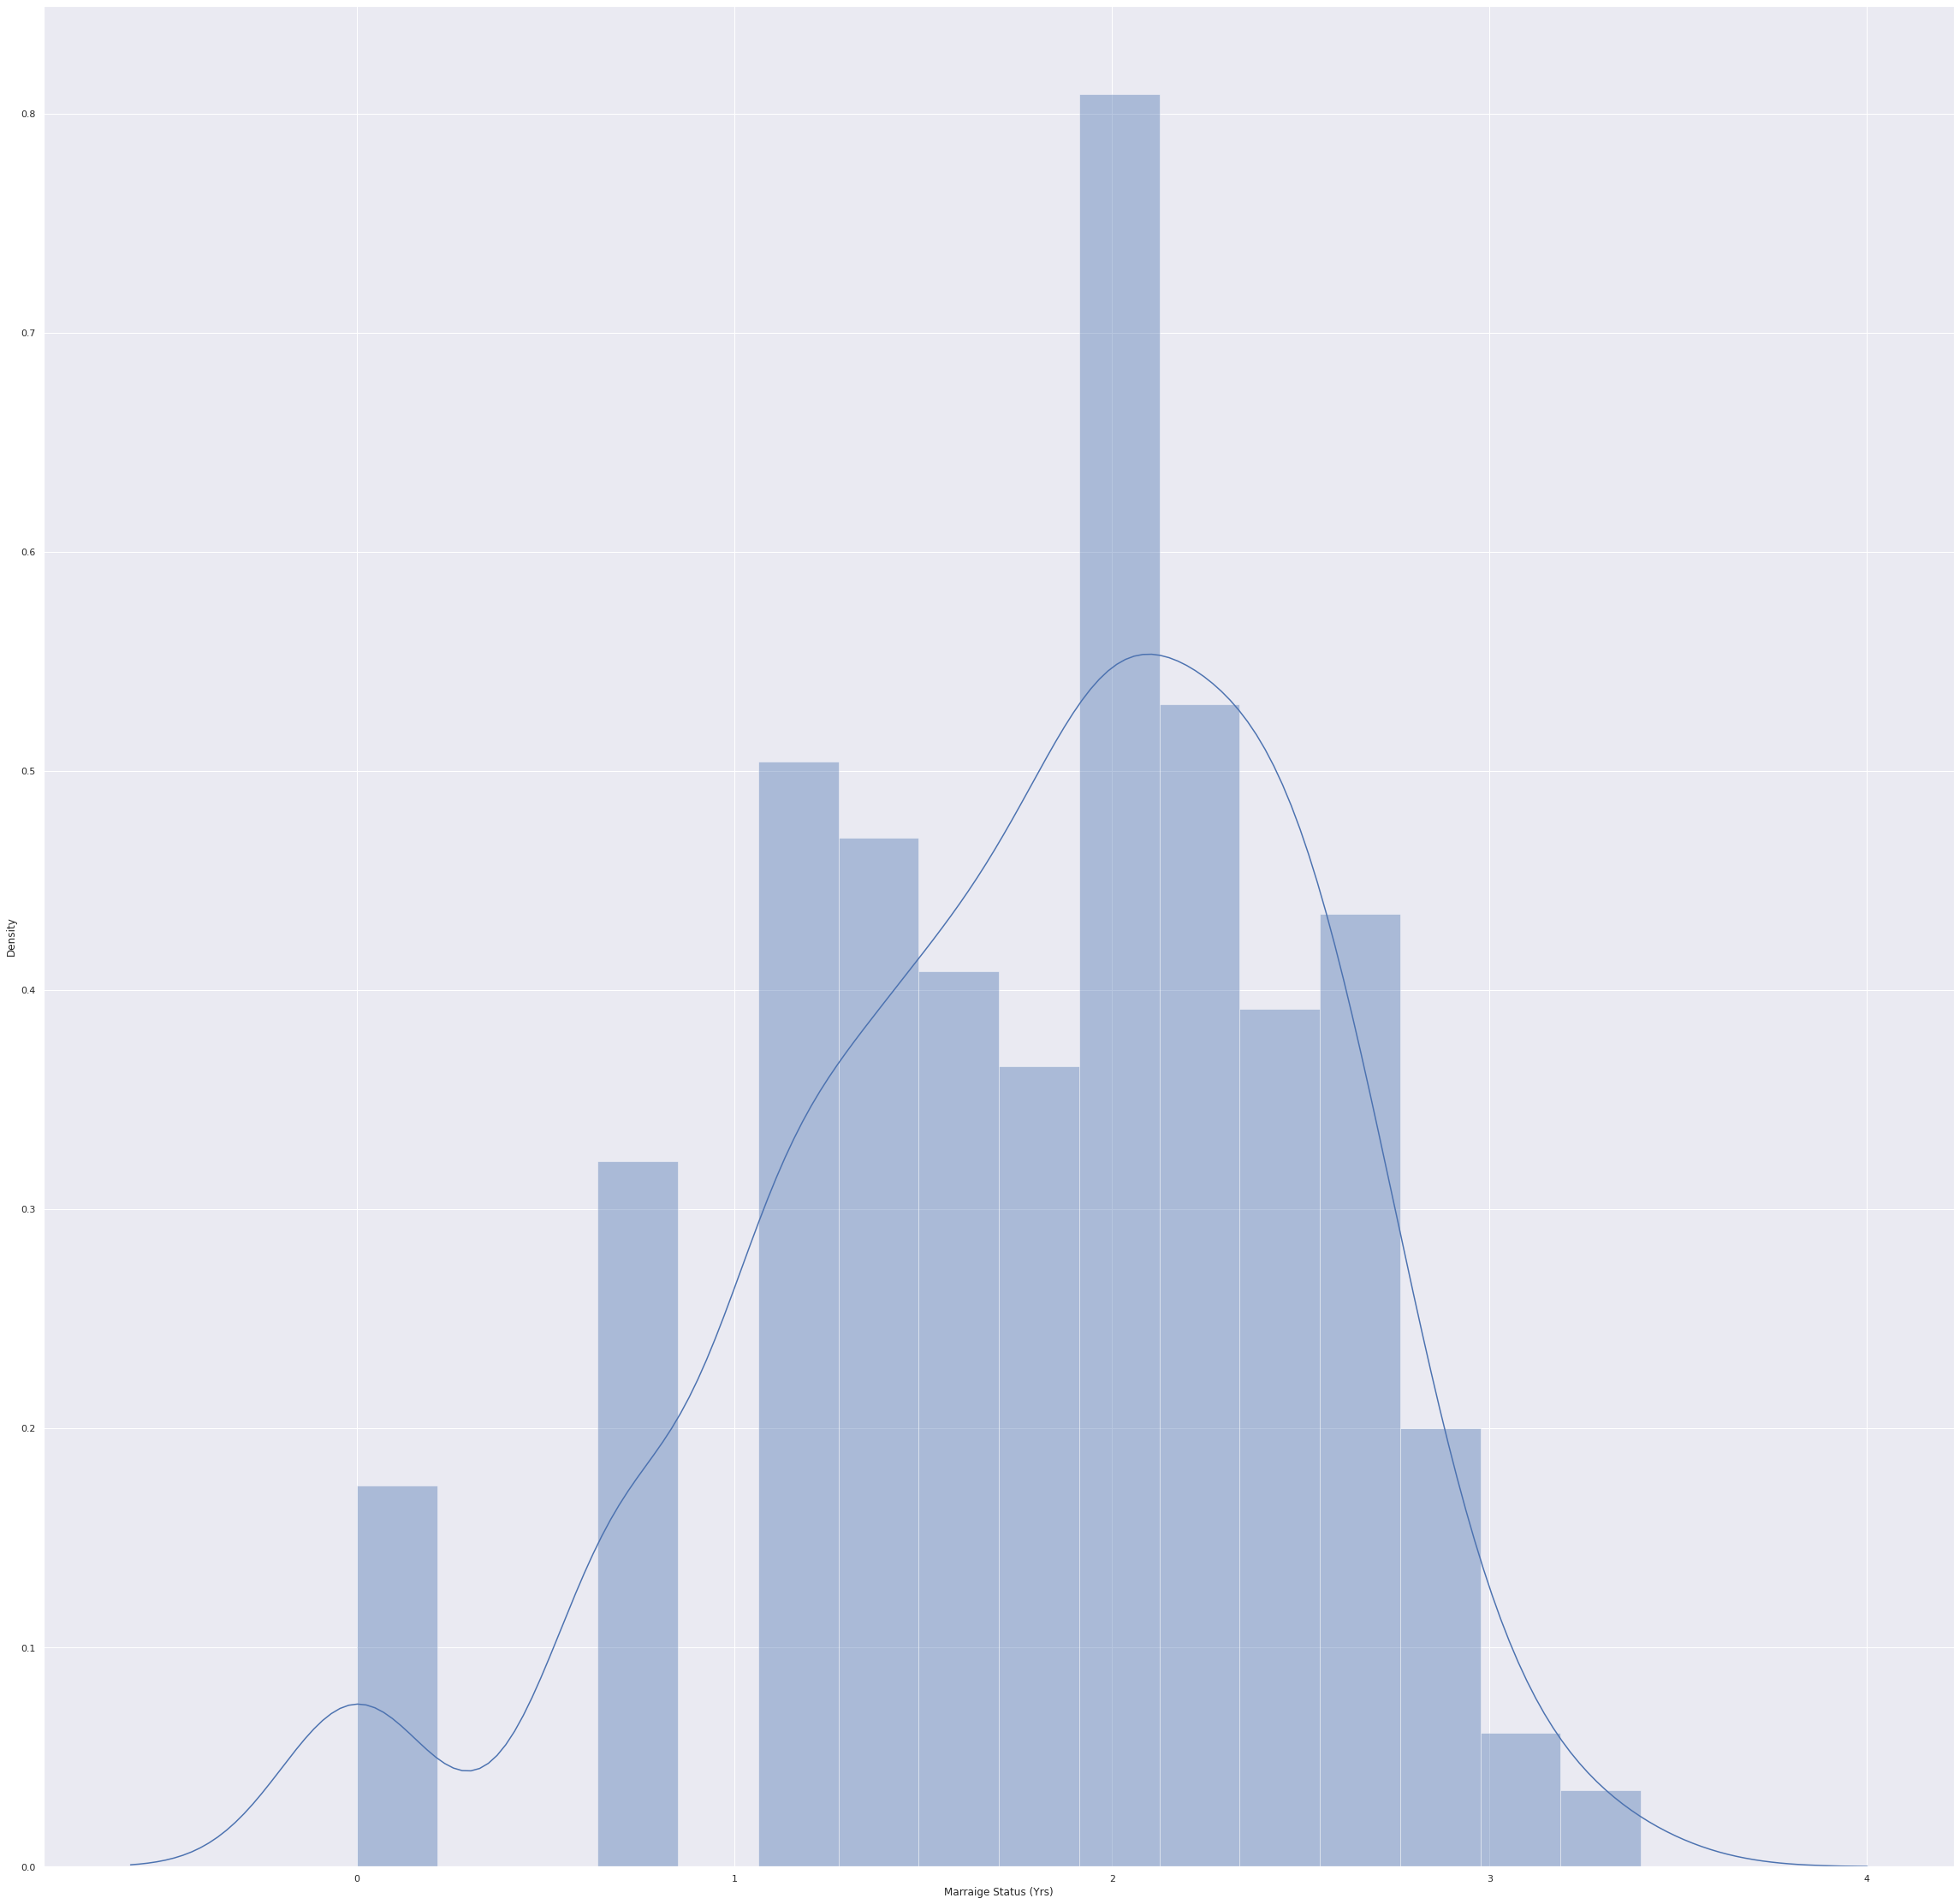

In [ ]:
sp_transformedMarriageYrs = sns.distplot(marriageYrsLog)


In [ ]:
print("Skewness: %f" % (marriageYrsLog).skew())

Skewness: -0.537891


As we can see, the log method transformed the 'SalePrice' distribution into a more symmetrical bell curve and the skewness level now is -0.01, well within the range.

There are other ways to correct for skewness of the data. For example, Square Root Transform (np.sqrt) and the Box-Cox Transform (stats.boxcox from the scipy stats library). To learn more about these two methods, please check out https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

Find all missing values and replace them

Text(0.5, 1.0, 'Total Missing Values')

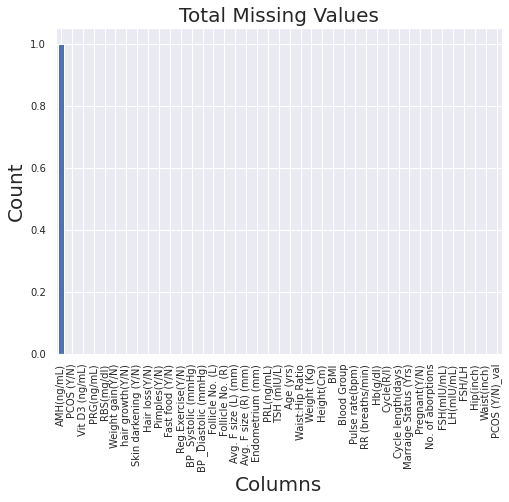

In [ ]:



total = df.isnull().sum().sort_values(ascending=False)
total.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [ ]:
median = df["AMH(ng/mL)"].median()
median

3.7

In [ ]:
df["AMH(ng/mL)"].fillna(median, inplace = True)

One of the most important transformations we need to apply to our data is feature scaling. There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so they end up ranging from 0 to 1. This is done by subtracting the min value and dividing by the max minus min.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.

Scikit-learn library provides MinMaxScaler for normalization and StandardScaler for standardization needs. For more information on scikit-learn MinMaxScaler and StandardScaler please visit their respective documentation websites.

First, we will normalize our data.

In [ ]:
continous_cols = df.select_dtypes(include = ['float64', 'int64'])


norm_data = MinMaxScaler().fit_transform(continous_cols)
print(norm_data)

[[0.         0.28571429 0.17662338 ... 0.75       0.75       0.47222222]
 [0.         0.57142857 0.44155844 ... 0.625      0.58333333 0.20555556]
 [1.         0.46428571 0.49090909 ... 0.75       0.83333333 0.55555556]
 ...
 [0.         0.57142857 0.2987013  ... 0.75       0.375      0.40555556]
 [0.         0.25       0.24675325 ... 0.75       0.66666667 0.63888889]
 [1.         0.10714286 0.66233766 ... 0.79166667 0.75       0.38333333]]


Note the data is now a ndarray







we can also standardize our data.

In [ ]:
scaled_data = StandardScaler().fit_transform(continous_cols)
scaled_data

array([[-0.69732613, -0.63460643, -1.36476953, ...,  0.83677604,
         0.76853707,  0.01113306],
       [-0.69732613,  0.84523012,  0.48673106, ..., -0.00508332,
        -0.43781578, -2.20761818],
       [ 1.43404922,  0.29029141,  0.83161842, ...,  0.83677604,
         1.3717135 ,  0.70449282],
       ...,
       [-0.69732613,  0.84523012, -0.5116271 , ...,  0.83677604,
        -1.94575684, -0.54355475],
       [-0.69732613, -0.819586  , -0.87466643, ...,  0.83677604,
         0.16536065,  1.39785259],
       [ 1.43404922, -1.55950427,  2.02964822, ...,  1.11739583,
         0.76853707, -0.72845069]])

numpy.newaxis is used to increase the dimension of the existing array by one more dimension, when used once. Thus,


# make it as row vector by inserting an axis along first dimension
In [9]: row_vec = arr[np.newaxis, :]     # arr[None, :]
In [10]: row_vec.shape
Out[10]: (1, 4)

# make it as column vector by inserting an axis along second dimension
In [11]: col_vec = arr[:, np.newaxis]     # arr[:, None]

In [ ]:
scaled_marriageYrs = StandardScaler().fit_transform(df['Marraige Status (Yrs)'][:,np.newaxis])
scaled_marriageYrs

array([[-0.13284078],
       [ 0.69559566],
       [ 0.48848655],
       [-0.75416811],
       [-1.37549545],
       [ 0.07426833],
       [-1.16838633],
       [ 1.10981389],
       [ 0.07426833],
       [-0.75416811],
       [-0.75416811],
       [-0.96127722],
       [-0.13284078],
       [ 1.52403211],
       [ 0.28137744],
       [ 2.55957766],
       [-1.16838633],
       [-0.13284078],
       [-0.13284078],
       [-0.13284078],
       [-0.33994989],
       [ 0.90270478],
       [ 0.48848655],
       [-0.547059  ],
       [ 0.90270478],
       [ 1.52403211],
       [-0.547059  ],
       [-0.75416811],
       [ 0.07426833],
       [-0.13284078],
       [-0.96127722],
       [ 1.52403211],
       [-1.16838633],
       [ 1.52403211],
       [-0.33994989],
       [ 0.48848655],
       [ 0.90270478],
       [-1.37549545],
       [ 1.93825033],
       [-1.37549545],
       [-0.33994989],
       [-1.16838633],
       [-0.96127722],
       [-0.96127722],
       [-0.13284078],
       [-0

## **Handling the Outliers**

### Finding the Outliers
In statistics, an outlier is an observation point that is distant from other observations. An outlier can be due to some mistakes in data collection or recording, or due to natural high variability of data points. How to treat an outlier highly depends on our data or the type of analysis to be performed. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots or scatter plots.

### Uni-variate Analysis

A box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points. To learn more about box plots please click here.

Here, we will use a box plot for the 'TSH (mIU/L)' and the 'AMH(ng/mL)' features.

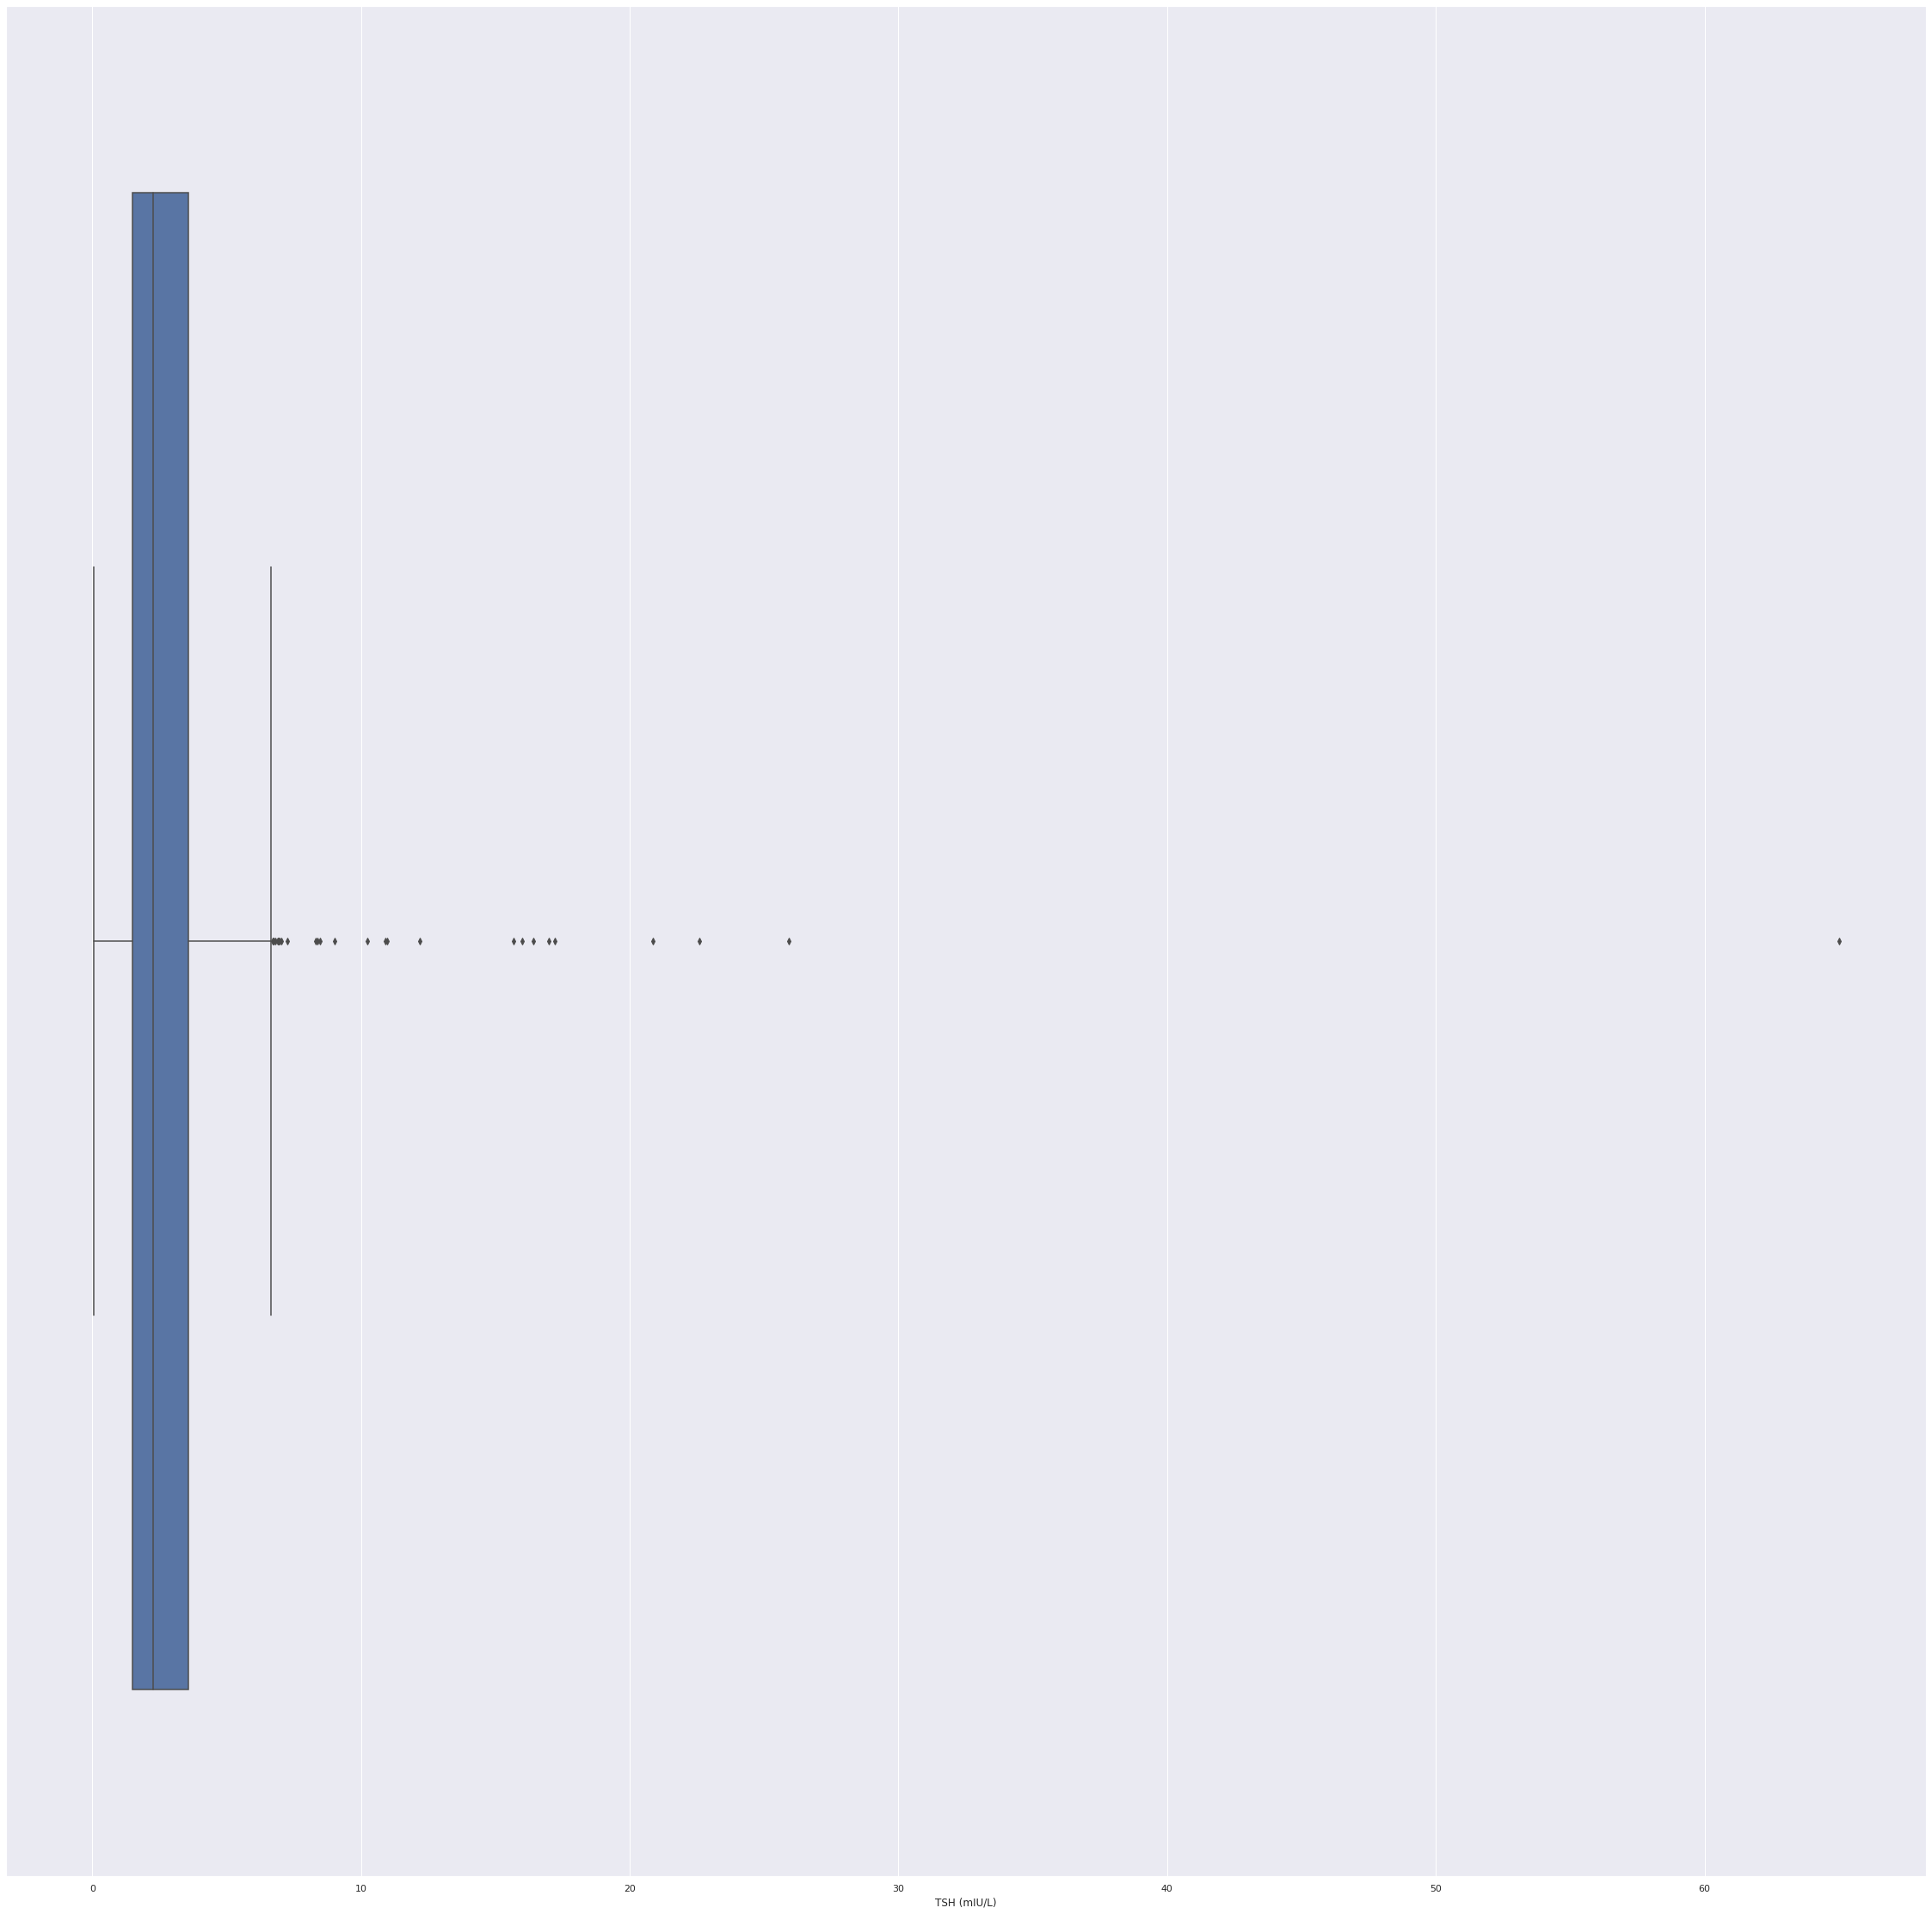

In [ ]:
sns.boxplot(x=df['TSH (mIU/L)'])

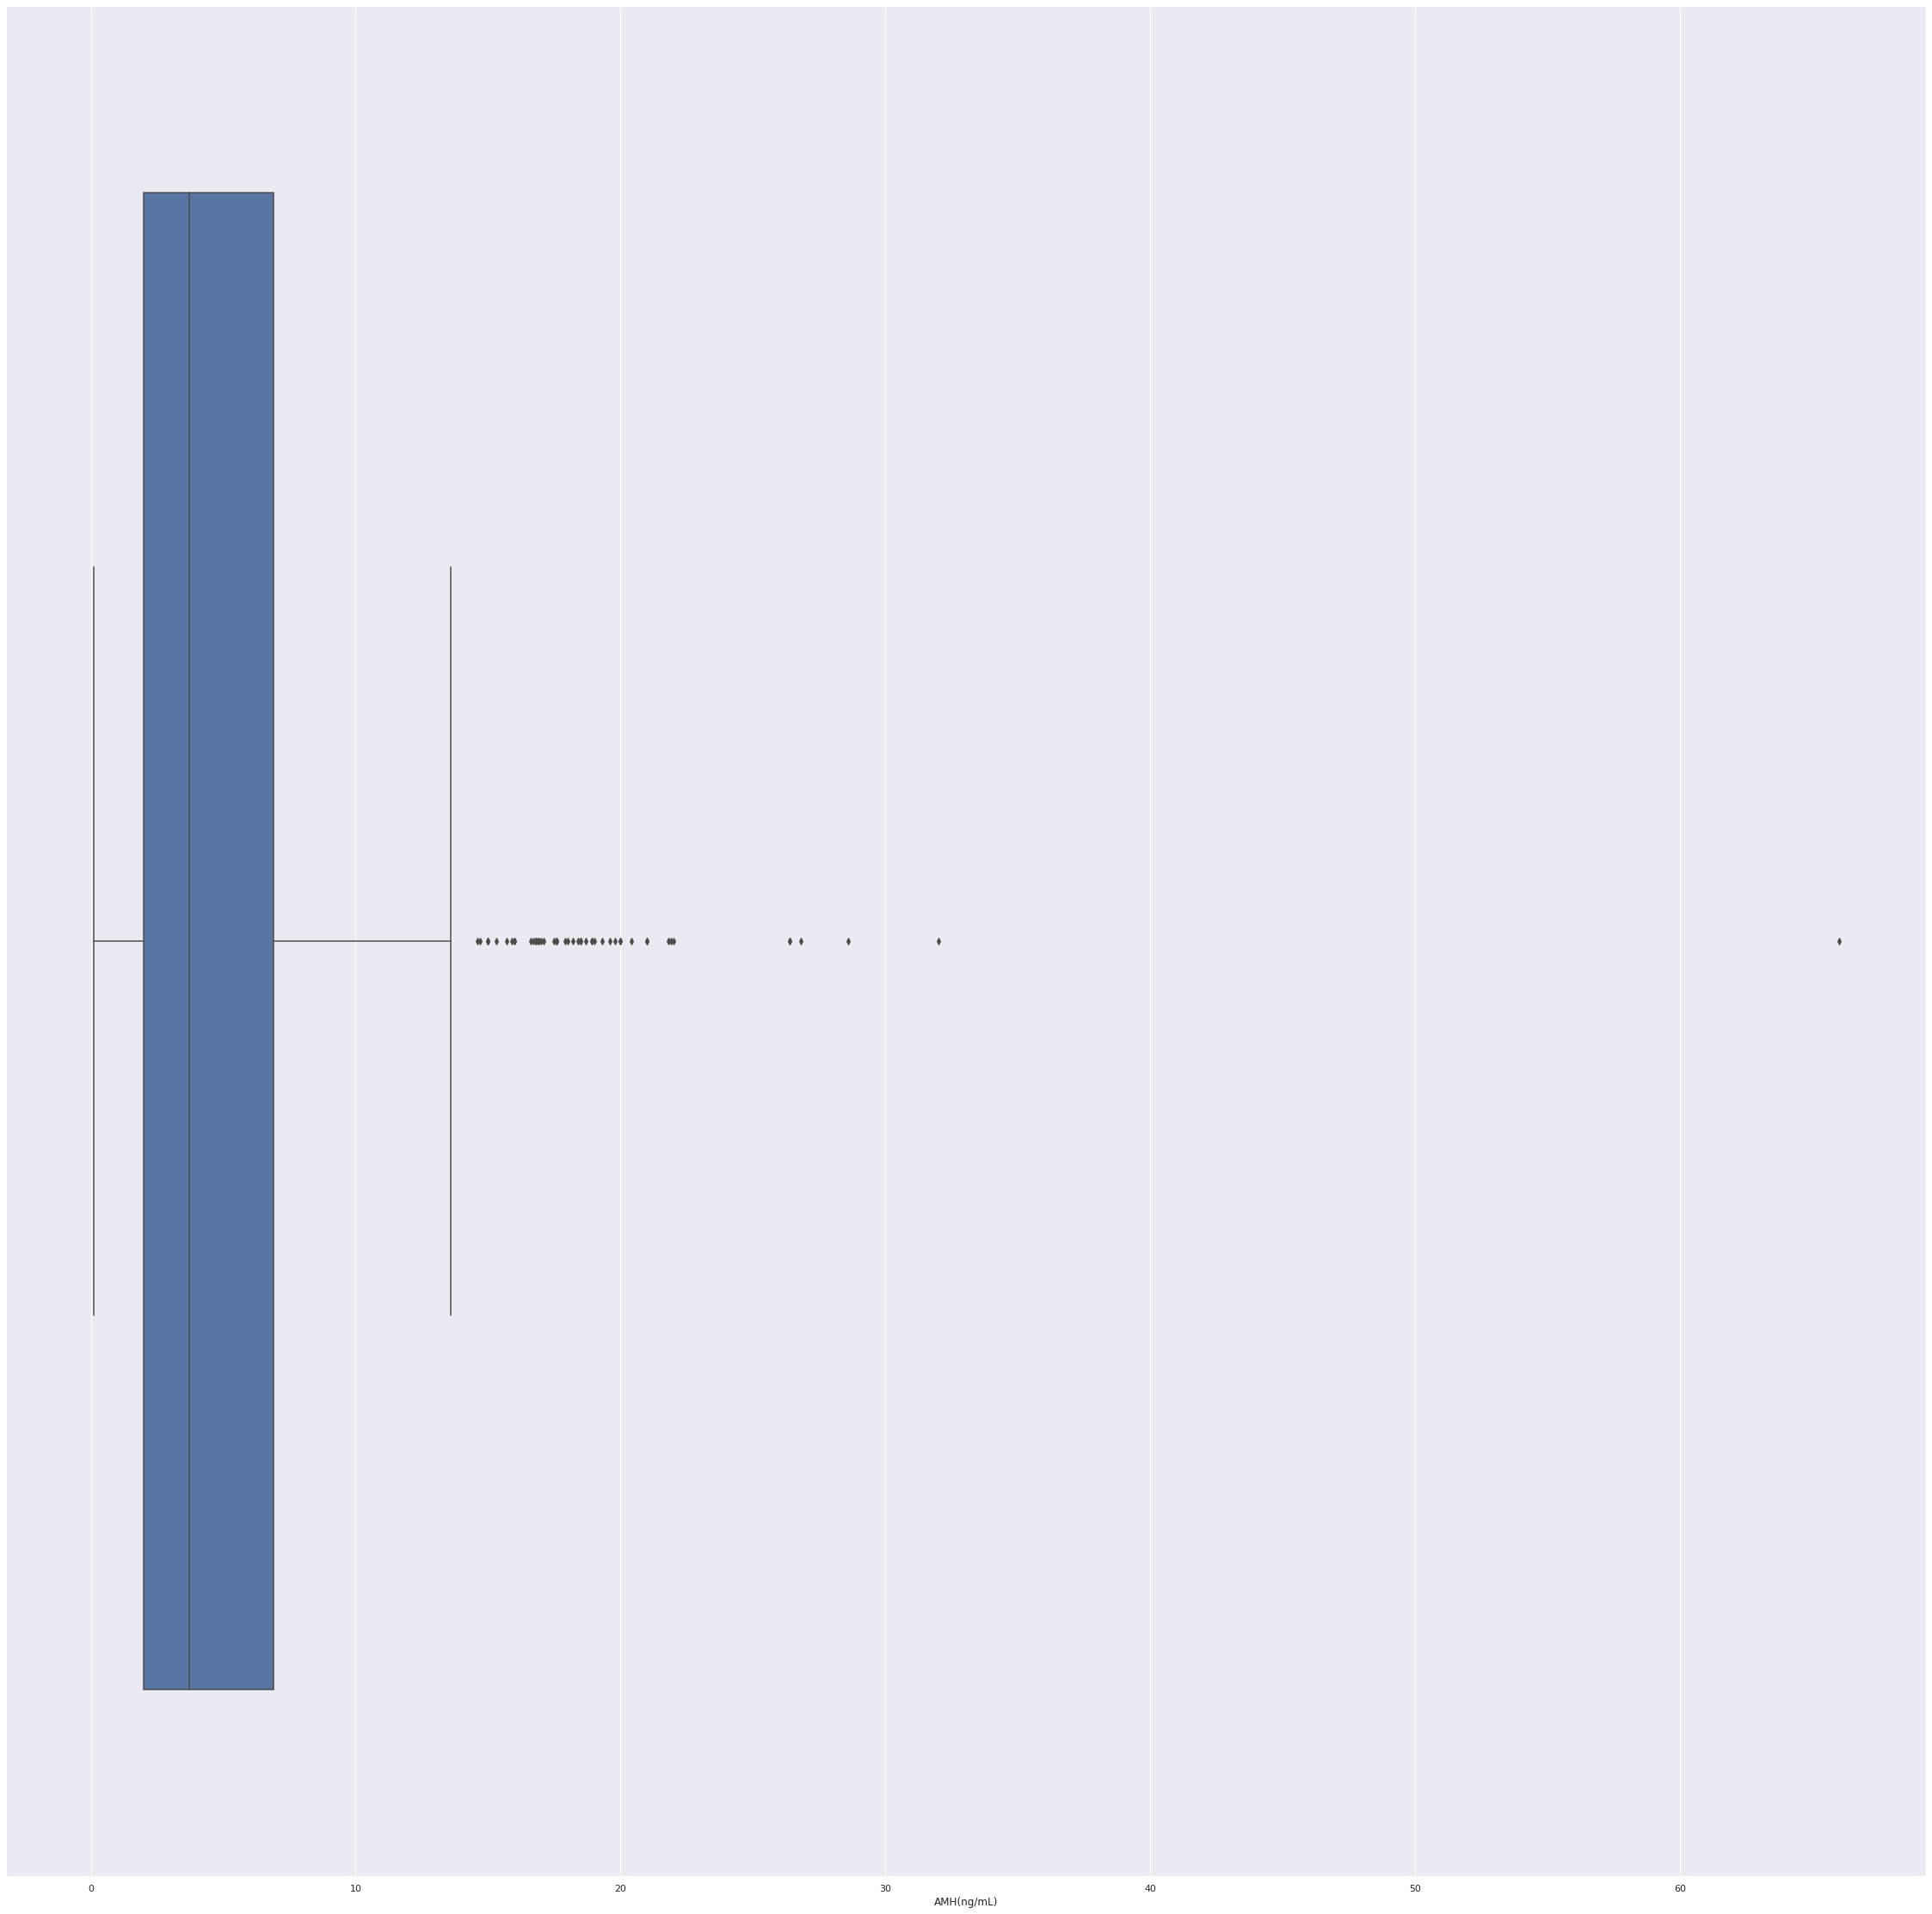

In [ ]:
sns.boxplot(x=df['AMH(ng/mL)'])


As we can see from these two plots, we have some points that are plotted outside the box plot area and that greatly deviate from the rest of the population. Whether to remove or keep them will greatly depend on the understanding of our data and the type of analysis to be performed. In this case, the points that are outside of our box plots in the 'Lot Area' and the 'Sale Price' might be the actual true data points and do not need to be removed.

### Bi-variate Analysis
Next, we will look at the bi-variate analysis of the two features, the PCOS , , and the marriage status and plot the scatter plot of the relationship between these two parameters.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


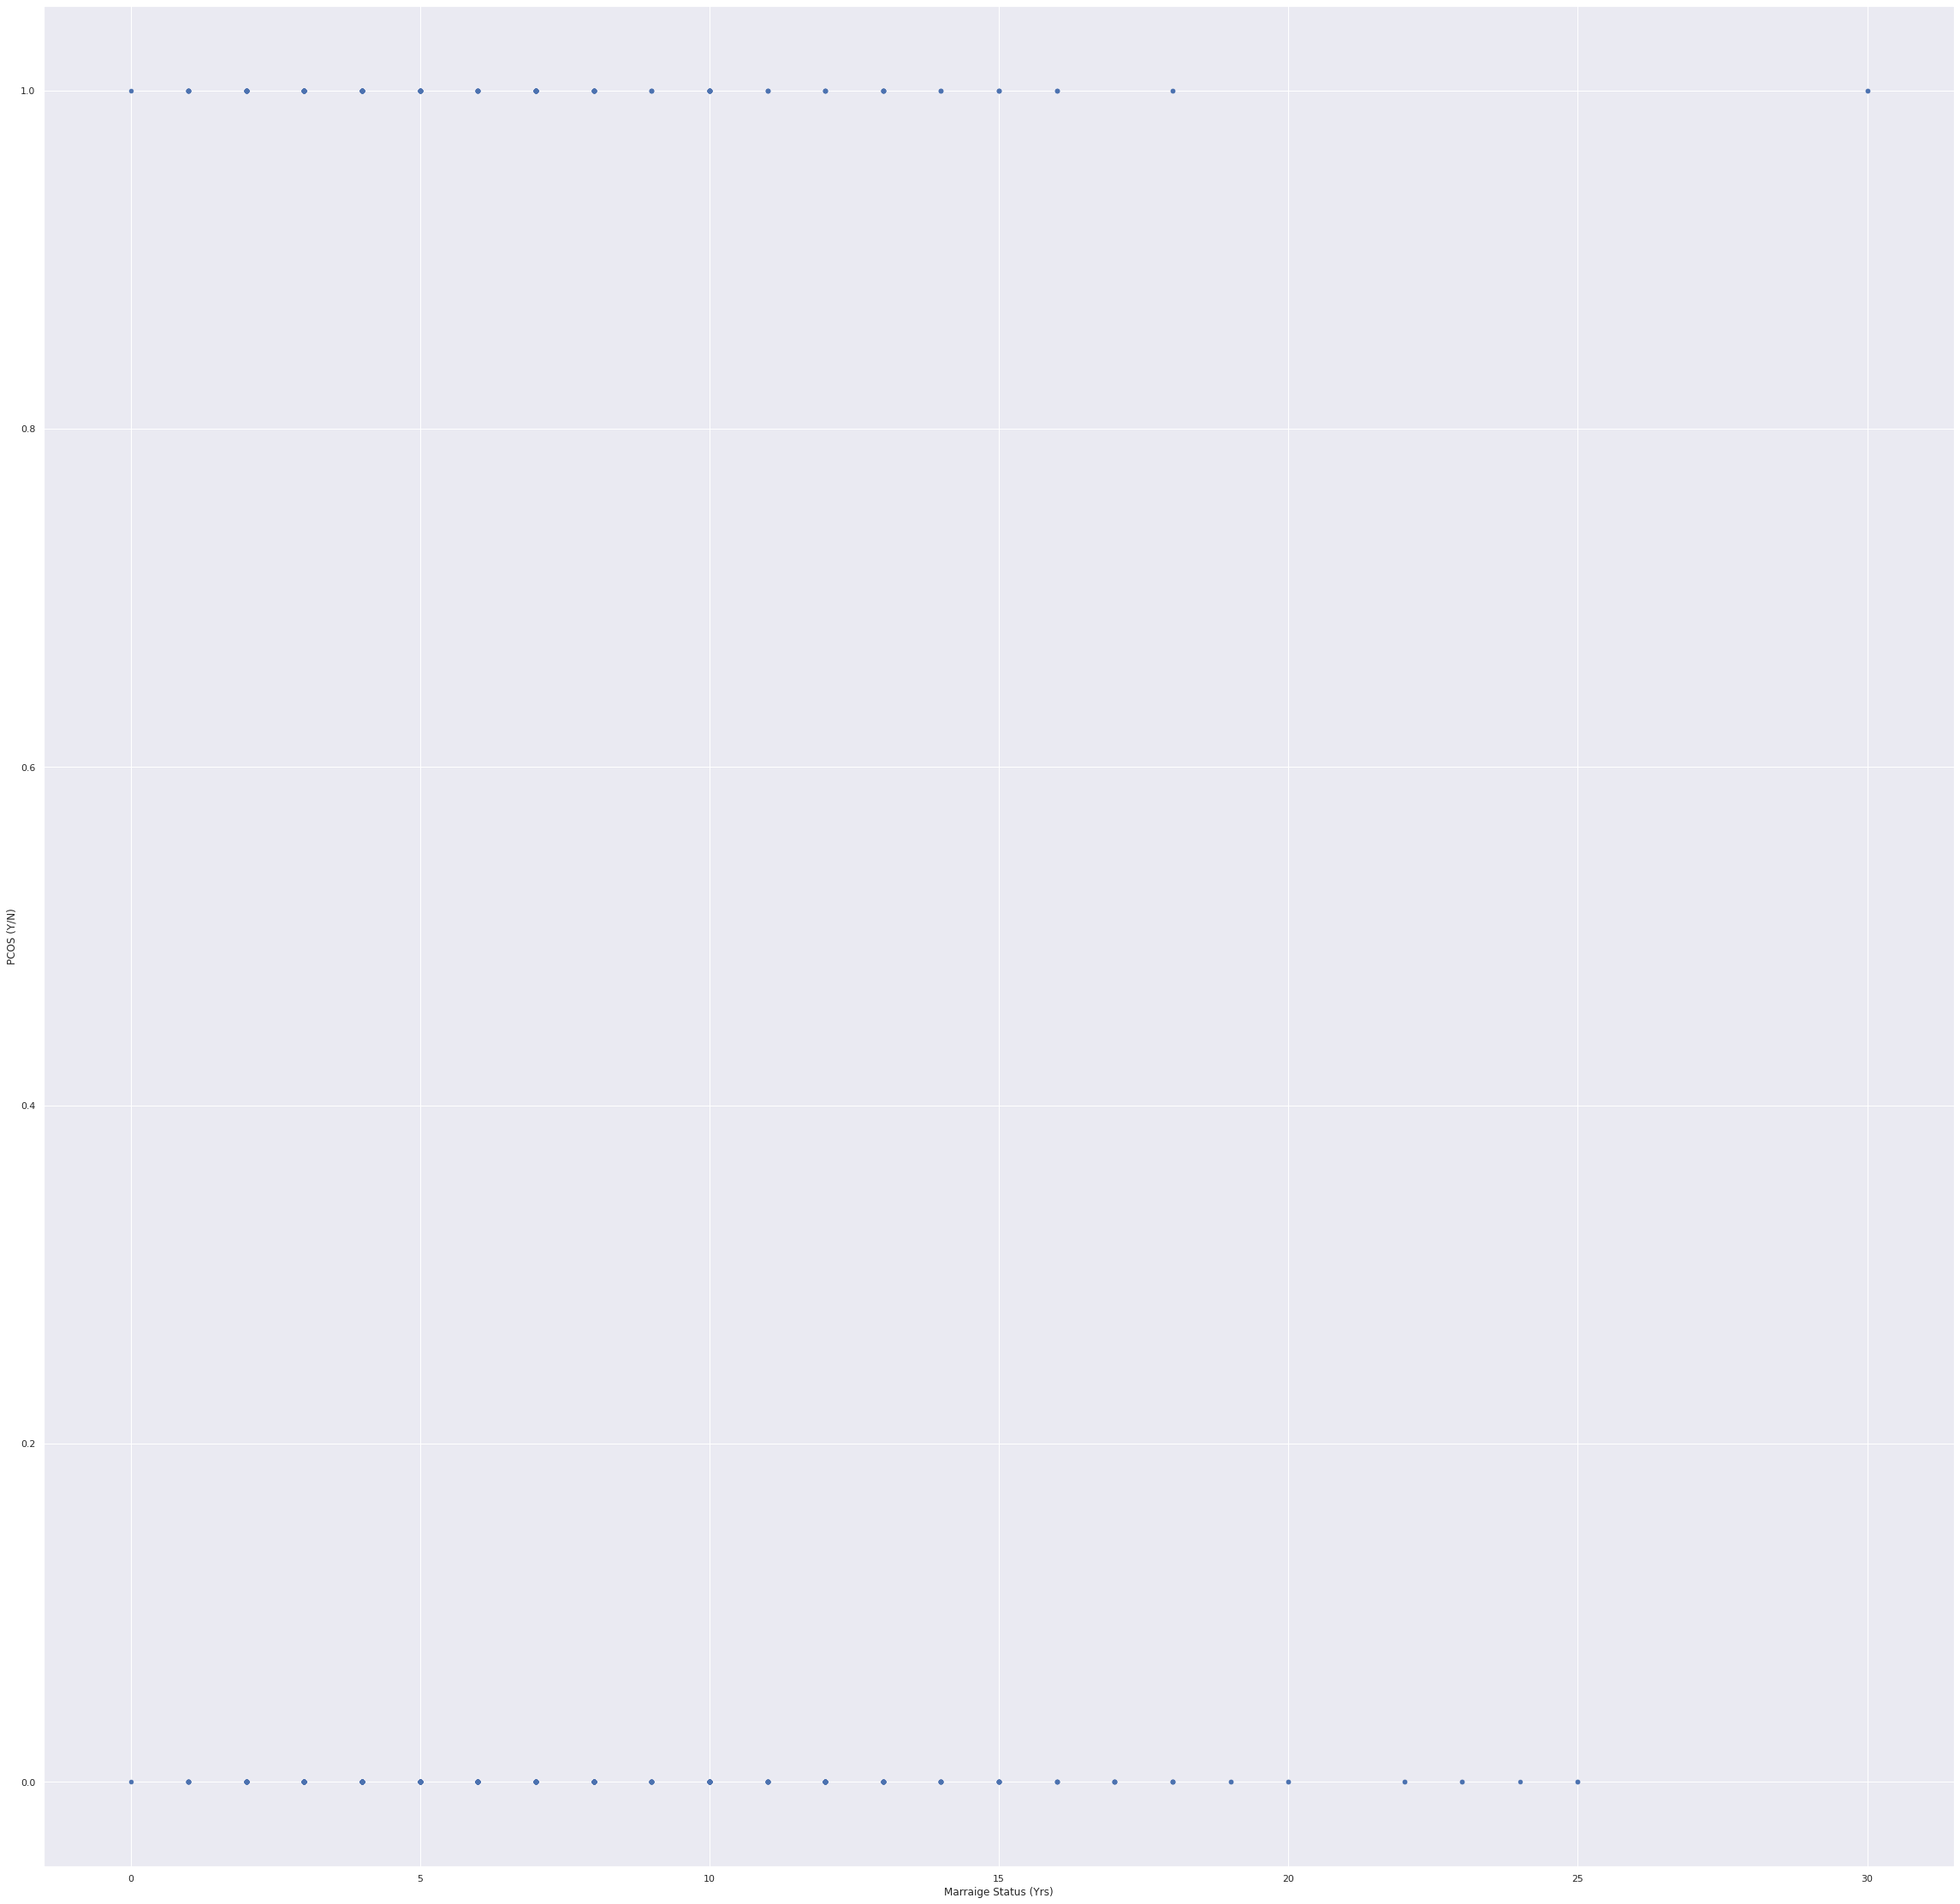

In [ ]:
married_yrs = df.plot.scatter(x='Marraige Status (Yrs)',
                      y='PCOS (Y/N)')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


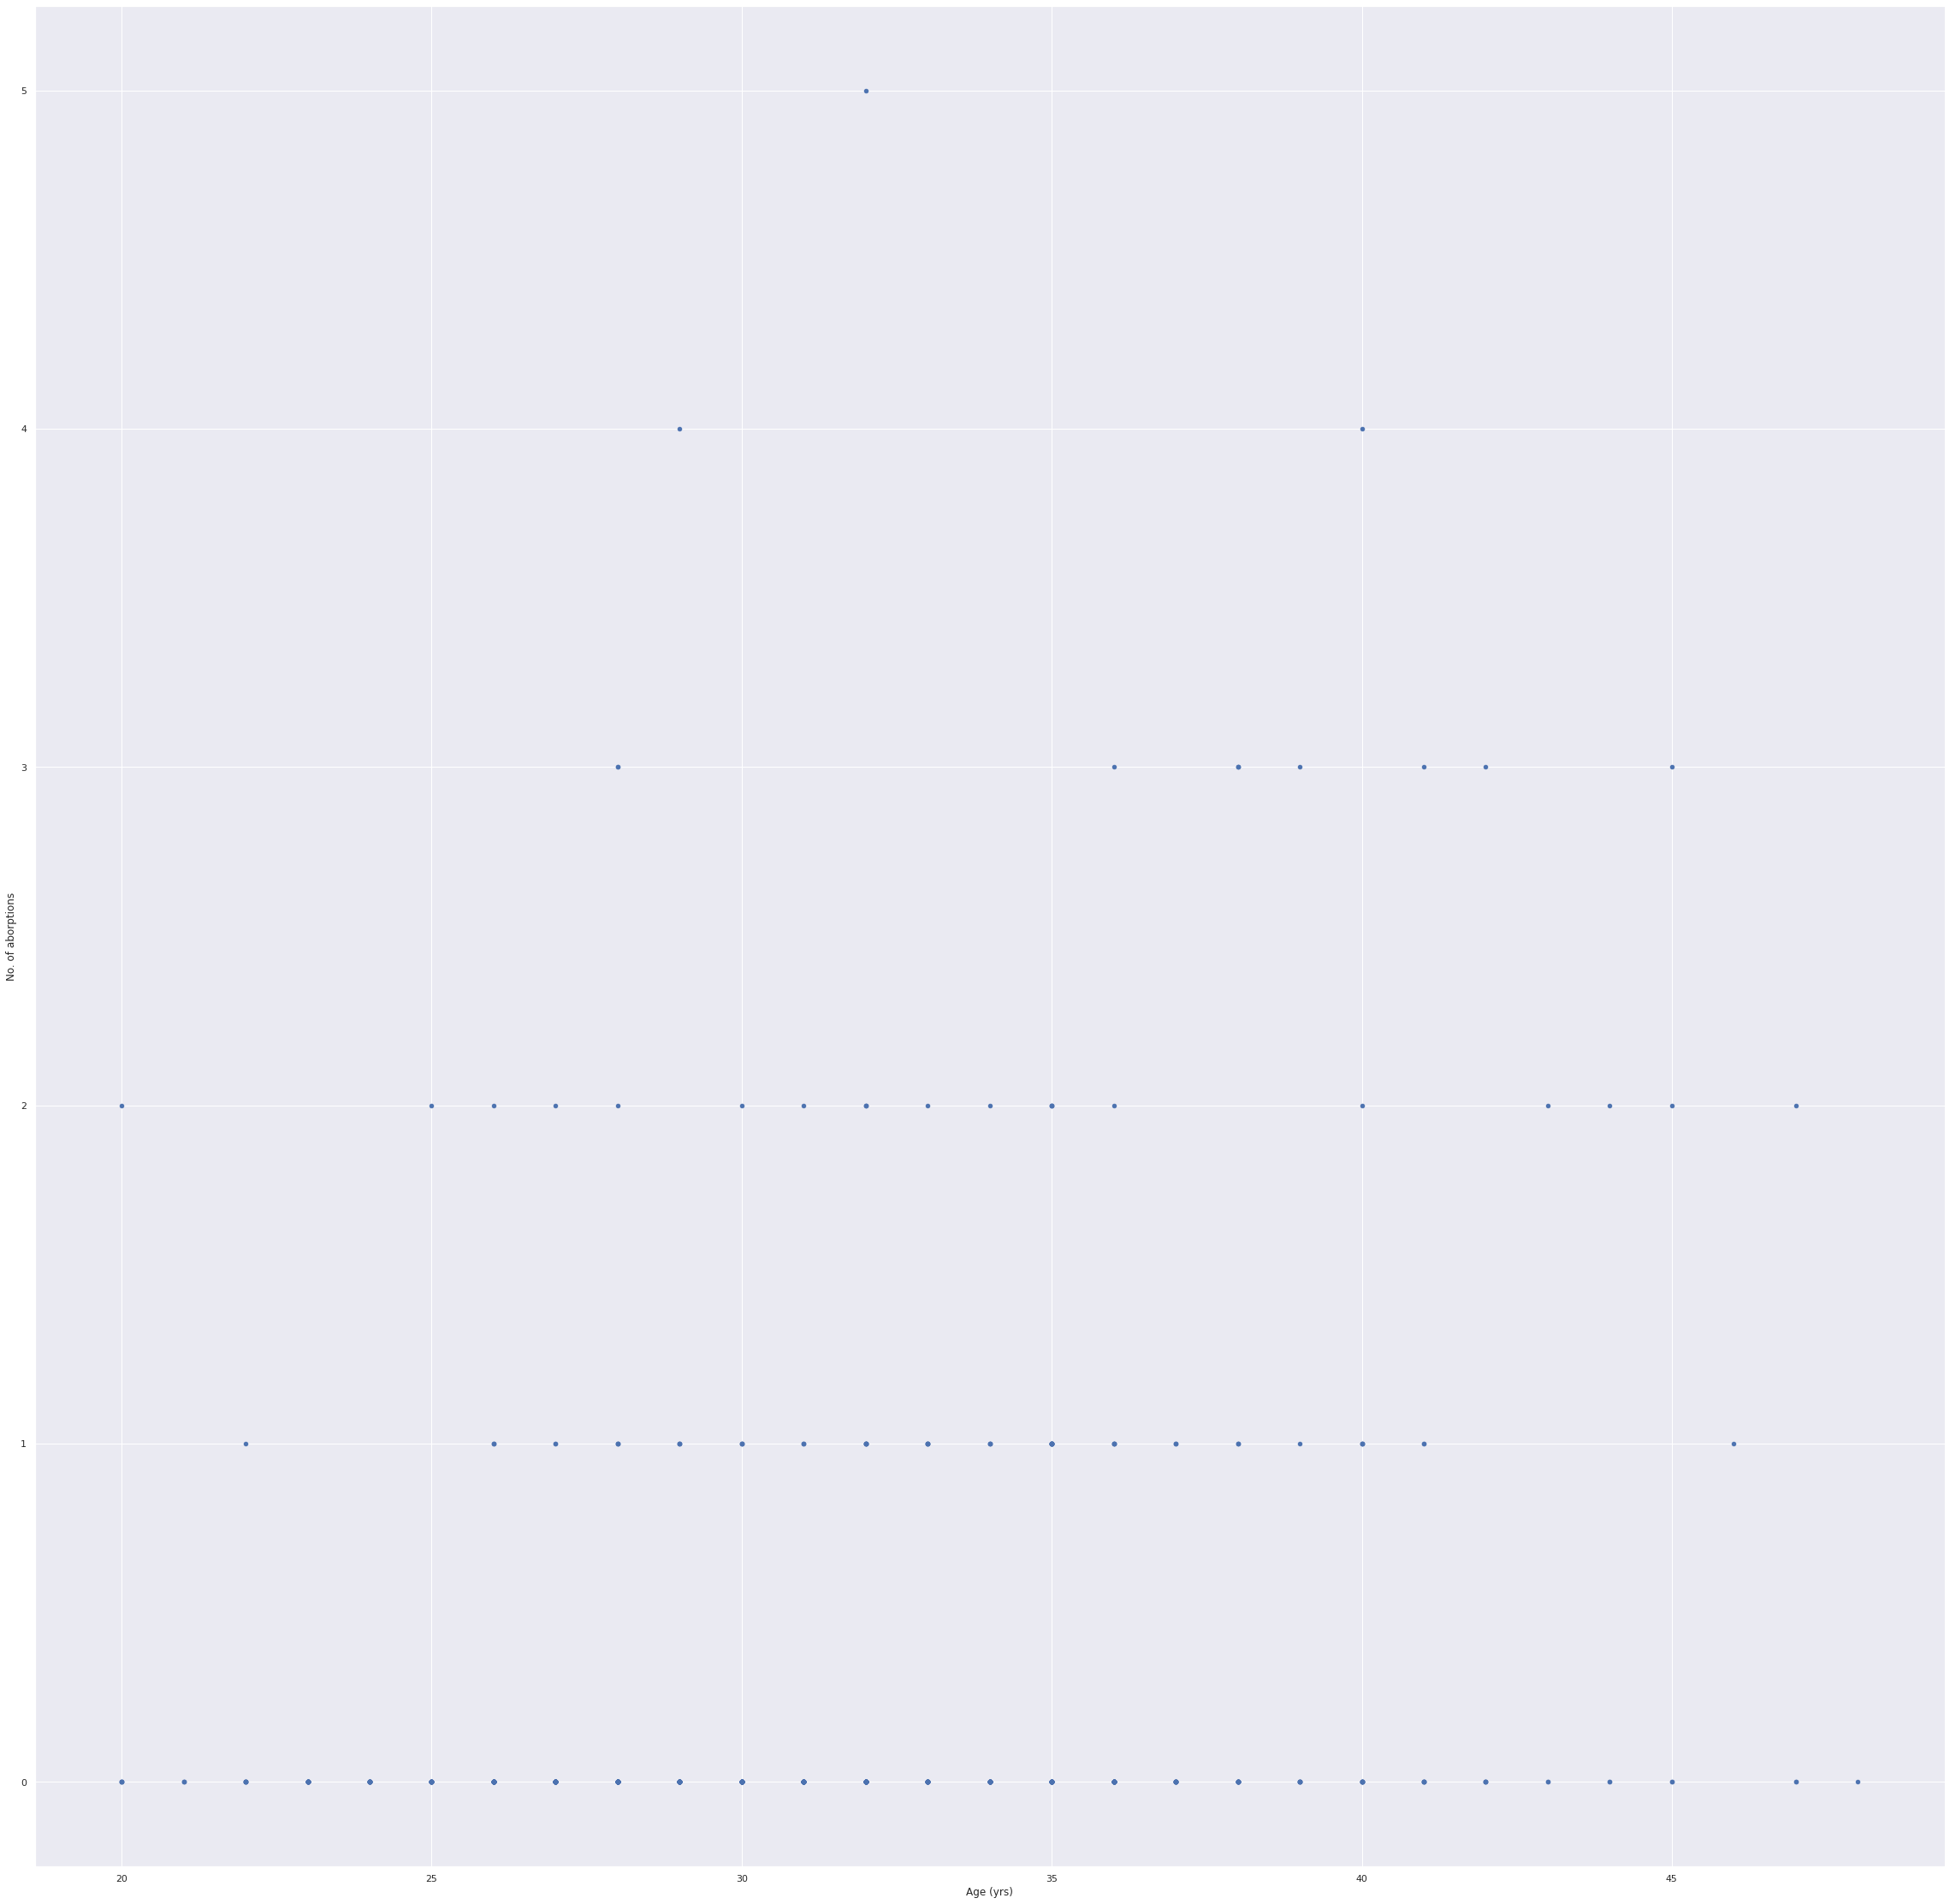

In [ ]:
married_yrs = df.plot.scatter(x='Age (yrs)',
                      y='No. of aborptions')

## Z-score Analysis

Z-score is another way to identify outliers mathematically. Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. In another words, Z-score is the value that quantifies relationship between a data point and a standard deviation and mean values of a group of points. Data points which are too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used. For example, if the Z-score value is greater than or less than 3 or -3 standard deviations respectively, that data point will be identified as a outlier.

To learn more about Z-score, please visit https://en.wikipedia.org/wiki/Standard_score?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01.

Below, we are using Z-score function from scipy library to detect the outliers in our 'AMH(ng/mL)' parameter. 

In [ ]:
df['AMH_Stats'] = stats.zscore(df['AMH(ng/mL)'])
# df['AMH_Stats']
df['zscore'] =(df['AMH(ng/mL)'] - df['AMH(ng/mL)'].mean())/df['AMH(ng/mL)'].std(ddof=0)

print(df['zscore'])
df[['AMH(ng/mL)','zscore']].describe().round(3)

0     -0.604743
1     -0.696716
2      0.171915
3     -0.749515
4     -0.572382
         ...   
536   -0.667762
537   -0.003514
538   -0.327122
539   -0.071642
540    2.449091
Name: zscore, Length: 541, dtype: float64


,AMH(ng/mL),zscore
count,541.000,541.000
mean,5.621,0.000
std,5.877,1.001
min,0.100,-0.940
25%,2.010,-0.615
50%,3.700,-0.327
75%,6.900,0.218
max,66.000,10.284


The scaled results show a mean of 0.000 and a standard deviation of 1.000, indicating that the transformed values fit the z-scale model. The max value of 10.275 is further proof of the presence of outliers, as it falls well above the z-score limit of +3.


The mean of each measurement of Blood Group .
The median of each of these measurements.
Hint: you may want to use Pandas groupby method to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on applying multiple functions at once for a hint.

# applying multiple functions at once - 2 methods

data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

In [ ]:
df.groupby('Blood Group').mean()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),AMH_Stats,zscore
Blood Group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11,0.314815,31.027778,58.806481,155.844667,24.159090,72.546296,19.240741,11.128704,2.425926,4.805556,7.074074,0.407407,0.314815,5.331204,3.033370,3.591870,38.083333,33.962963,0.892220,3.195981,5.594630,25.099630,27.693148,0.618426,99.816667,0.398148,0.231481,0.324074,0.481481,0.453704,0.583333,0.166667,114.351852,76.481481,5.768519,6.379630,15.527778,15.538611,8.449537,-0.004429,-0.004429
12,0.307692,33.846154,62.230769,159.310769,24.395250,74.153846,19.384615,11.138462,2.615385,5.000000,9.615385,0.538462,0.384615,6.344615,2.596923,3.923623,38.461538,34.307692,0.891845,1.984615,4.488462,24.330769,32.654615,0.400000,115.230769,0.384615,0.230769,0.384615,0.307692,0.307692,0.538462,0.307692,113.076923,73.846154,6.230769,7.769231,15.230769,16.769231,8.365385,-0.192831,-0.192831
13,0.311111,31.748148,58.413333,156.220148,23.915048,73.481481,19.288889,11.209704,2.466667,5.096296,8.096296,0.392593,0.348148,5.311333,17.467704,3.792167,37.748148,33.577778,0.891241,2.822415,5.717704,24.293704,68.770296,1.031719,98.037037,0.348148,0.244444,0.266667,0.474074,0.518519,0.459259,0.274074,114.311111,77.185185,5.992593,6.785185,14.762963,15.416296,8.517778,0.016533,0.016533
14,0.375000,30.312500,58.518750,157.561750,23.448391,73.125000,19.125000,11.506250,2.375000,4.875000,8.125000,0.437500,0.375000,4.871062,3.670625,1.977478,36.687500,32.750000,0.896606,3.029375,7.086437,23.756875,26.522687,0.440000,103.750000,0.250000,0.312500,0.125000,0.437500,0.375000,0.312500,0.187500,115.625000,78.750000,5.750000,6.187500,15.187500,15.312500,9.090625,0.249655,0.249655
15,0.320388,31.616505,60.099029,156.652330,24.459125,73.402913,19.266990,11.116359,2.631068,4.961165,7.669903,0.373786,0.233010,29.475845,2.649612,11.951760,38.213592,33.936893,0.889324,2.843646,5.317330,23.024223,29.233228,0.390010,99.339806,0.388350,0.276699,0.315534,0.456311,0.514563,0.538835,0.281553,115.242718,76.834951,6.165049,6.543689,14.798544,15.291262,8.528252,-0.051659,-0.051659
16,0.421053,29.526316,66.915789,157.648000,26.914877,73.105263,19.368421,11.031579,2.736842,5.052632,6.473684,0.368421,0.263158,5.047368,2.395895,6.874672,39.789474,36.105263,0.907011,3.688421,6.900000,22.443158,27.852105,0.660368,97.578947,0.315789,0.526316,0.315789,0.315789,0.263158,0.473684,0.000000,113.684211,77.368421,8.789474,8.052632,15.042105,15.631579,7.805263,0.217901,0.217901
17,0.380952,31.190476,58.792857,156.025905,24.100401,73.476190,19.000000,11.233333,2.809524,4.690476,7.261905,0.261905,0.261905,6.355000,3.022381,3.261203,36.666667,32.809524,0.896250,3.268571,6.055952,28.907619,173.274524,0.447619,102.928571,0.428571,0.333333,0.380952,0.428571,0.571429,0.476190,0.333333,114.285714,77.619048,6.142857,6.333333,15.511905,15.654762,8.169048,0.074143,0.074143
18,0.500000,29.000000,80.200000,163.272000,30.100000,71.000000,18.000000,11.050000,3.000000,4.000000,7.000000,0.000000,0.000000,5.770000,1.855000,11.675238,45.000000,41.000000,0.910714,9.630000,6.050000,43.790000,26.000000,0.260000,98.500000,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,0.000000,115.000000,80.000000,8.000000,10.500000,14.000000,16.250000,10.300000,0.073130,0.073130


In [ ]:
df.groupby('Blood Group').median()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),AMH_Stats,zscore
Blood Group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11,0.0,31.0,59.3,156.000,24.100000,72.0,19.0,11.00,2.0,5.0,6.5,0.0,0.0,5.350,2.355,2.228700,38.0,34.0,0.894737,2.035,2.960,21.920,24.450,0.32,99.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,110.0,80.0,5.0,6.0,16.0,16.00,8.50,-0.453159,-0.453159
12,0.0,33.0,61.0,161.544,24.400000,72.0,18.0,11.20,2.0,5.0,10.0,1.0,0.0,6.060,3.220,2.405063,39.0,35.0,0.875000,1.680,3.020,25.370,28.700,0.36,92.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,110.0,70.0,5.0,7.0,15.0,17.00,8.15,-0.442939,-0.442939
13,0.0,31.0,58.0,156.000,24.000000,72.0,20.0,11.00,2.0,5.0,7.0,0.0,0.0,4.840,2.160,2.186207,38.0,34.0,0.894737,2.310,3.780,20.450,26.500,0.31,95.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,120.0,80.0,6.0,6.0,15.0,16.00,8.40,-0.313496,-0.313496
14,0.0,27.0,58.0,157.500,23.652794,72.5,19.0,11.20,2.0,5.0,6.0,0.0,0.0,5.165,3.070,1.758958,37.0,32.0,0.894737,2.115,5.695,25.095,26.178,0.46,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,80.0,5.0,5.0,15.0,15.00,9.50,0.012666,0.012666
15,0.0,31.0,60.0,157.000,24.422222,72.0,18.0,11.00,2.0,5.0,6.0,0.0,0.0,4.360,2.120,2.102481,38.0,34.0,0.894737,2.250,3.750,21.590,25.600,0.30,94.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,120.0,80.0,5.0,6.0,15.0,15.50,8.50,-0.318606,-0.318606
16,0.0,30.0,66.0,158.000,25.800000,72.0,18.0,11.00,2.0,5.0,6.0,0.0,0.0,5.320,2.300,2.333333,40.0,36.0,0.913043,3.100,4.710,23.010,28.000,0.30,100.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,110.0,80.0,8.0,7.0,16.0,18.00,7.60,-0.155099,-0.155099
17,0.0,31.5,56.5,155.000,23.459397,72.0,18.0,11.05,2.0,5.0,7.0,0.0,0.0,5.280,2.065,2.467115,37.0,33.0,0.897436,2.200,4.500,23.980,29.700,0.35,100.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,110.0,80.0,5.0,5.0,16.0,16.00,8.00,-0.190866,-0.190866
18,0.5,29.0,80.2,163.272,30.100000,71.0,18.0,11.05,3.0,4.0,7.0,0.0,0.0,5.770,1.855,11.675238,45.0,41.0,0.910714,9.630,6.050,43.790,26.000,0.26,98.5,0.5,0.5,0.5,0.0,0.5,0.5,0.0,115.0,80.0,8.0,10.5,14.0,16.25,10.30,0.073130,0.073130


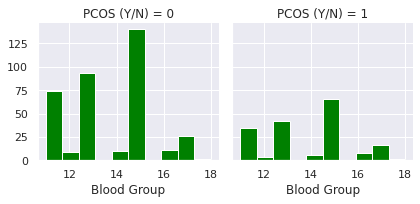

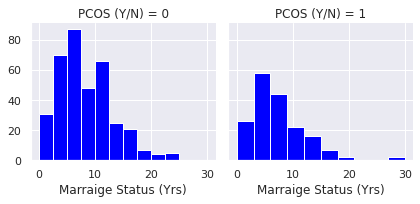

In [ ]:
plot = sns.FacetGrid(df, col='PCOS (Y/N)', margin_titles=True)
plot.map(plt.hist, 'Blood Group', color='green')
plot = sns.FacetGrid(df, col='PCOS (Y/N)', margin_titles=True)
plot.map(plt.hist, 'Marraige Status (Yrs)', color='blue')

In [ ]:
df.groupby('PCOS (Y/N)').agg([np.mean, np.median, np.product]) 

Age (yrs)                Weight (Kg)                 Height(Cm)  \
                 mean median product        mean median product        mean   
PCOS (Y/N)                                                                    
0           32.065934   32.0       0   58.008791   58.0     inf  156.197934   
1           30.124294   29.0       0   62.985876   62.0     inf  157.074847   

                                 BMI                       Blood Group         \
           median product       mean median        product        mean median   
PCOS (Y/N)                                                                      
0           156.0     inf  23.747397   23.6            inf   13.755495   14.0   
1           158.0     inf  25.470919   25.1  4.953425e+247   13.898305   15.0   

                                Pulse rate(bpm)                 \
                        product            mean median product   
PCOS (Y/N)                                                       
0                             0       72.964286   72.0       0   
1           8170796361445277696       73.830508   72.0       0   

           RR (breaths/min)                  Hb(g/dl)                        \
                       mean median product       mean median        product   
PCOS (Y/N)                                                                    
0                 19.200549   18.0       0  11.107390   11.0            inf   
1                 19.333333   20.0       0  11.268305   11.0  9.483482e+185   

           Cycle(R/I)                Cycle length(days)                 \
                 mean median product               mean median product   
PCOS (Y/N)                                                               
0            2.307692    2.0       0           5.126374    5.0       0   
1            3.079096    4.0       0           4.559322    5.0       0   

           Marraige Status (Yrs)                Pregnant(Y/N)                 \
                            mean median product          mean median product   
PCOS (Y/N)                                                                     
0                       8.038462    7.0       0      0.390110    0.0       0   
1                       6.824859    6.0       0      0.361582    0.0       0   

           No. of aborptions                FSH(mIU/mL)                        \
                        mean median product        mean median        product   
PCOS (Y/N)                                                                      
0                   0.315934    0.0       0   19.185956   5.01  1.374719e+245   
1                   0.231638    0.0       0    5.174593   4.48  1.009575e+112   

           LH(mIU/mL)                         FSH/LH                           \
                 mean median       product      mean    median        product   
PCOS (Y/N)                                                                      
0            2.612676  2.305  1.000201e+90  7.680132  2.363636  1.366567e+155   
1           14.402328  2.220  2.397055e+54  5.310427  2.036011   4.188116e+57   

            Hip(inch)                Waist(inch)                 \
                 mean median product        mean median product   
PCOS (Y/N)                                                        
0           37.543956   38.0       0   33.428571   34.0       0   
1           38.915254   39.0       0   34.689266   35.0       0   

           Waist:Hip Ratio                         TSH (mIU/L)         \
                      mean    median       product        mean median   
PCOS (Y/N)                                                              
0                 0.891495  0.894737  4.242267e-19    3.007810  2.165   
1                 0.892717  0.897436  1.481839e-09    2.926723  2.310   

                          AMH(ng/mL)                       PRL(ng/mL)          \
                  product       mean median        product       mean  median   
PCOS (Y/N)                         

[Text(0, 0.5, 'Endometrium'),
 Text(0.5, 0, 'Marriage'),
 Text(0.5, 1.0, 'Endometrim vs marriage years')]

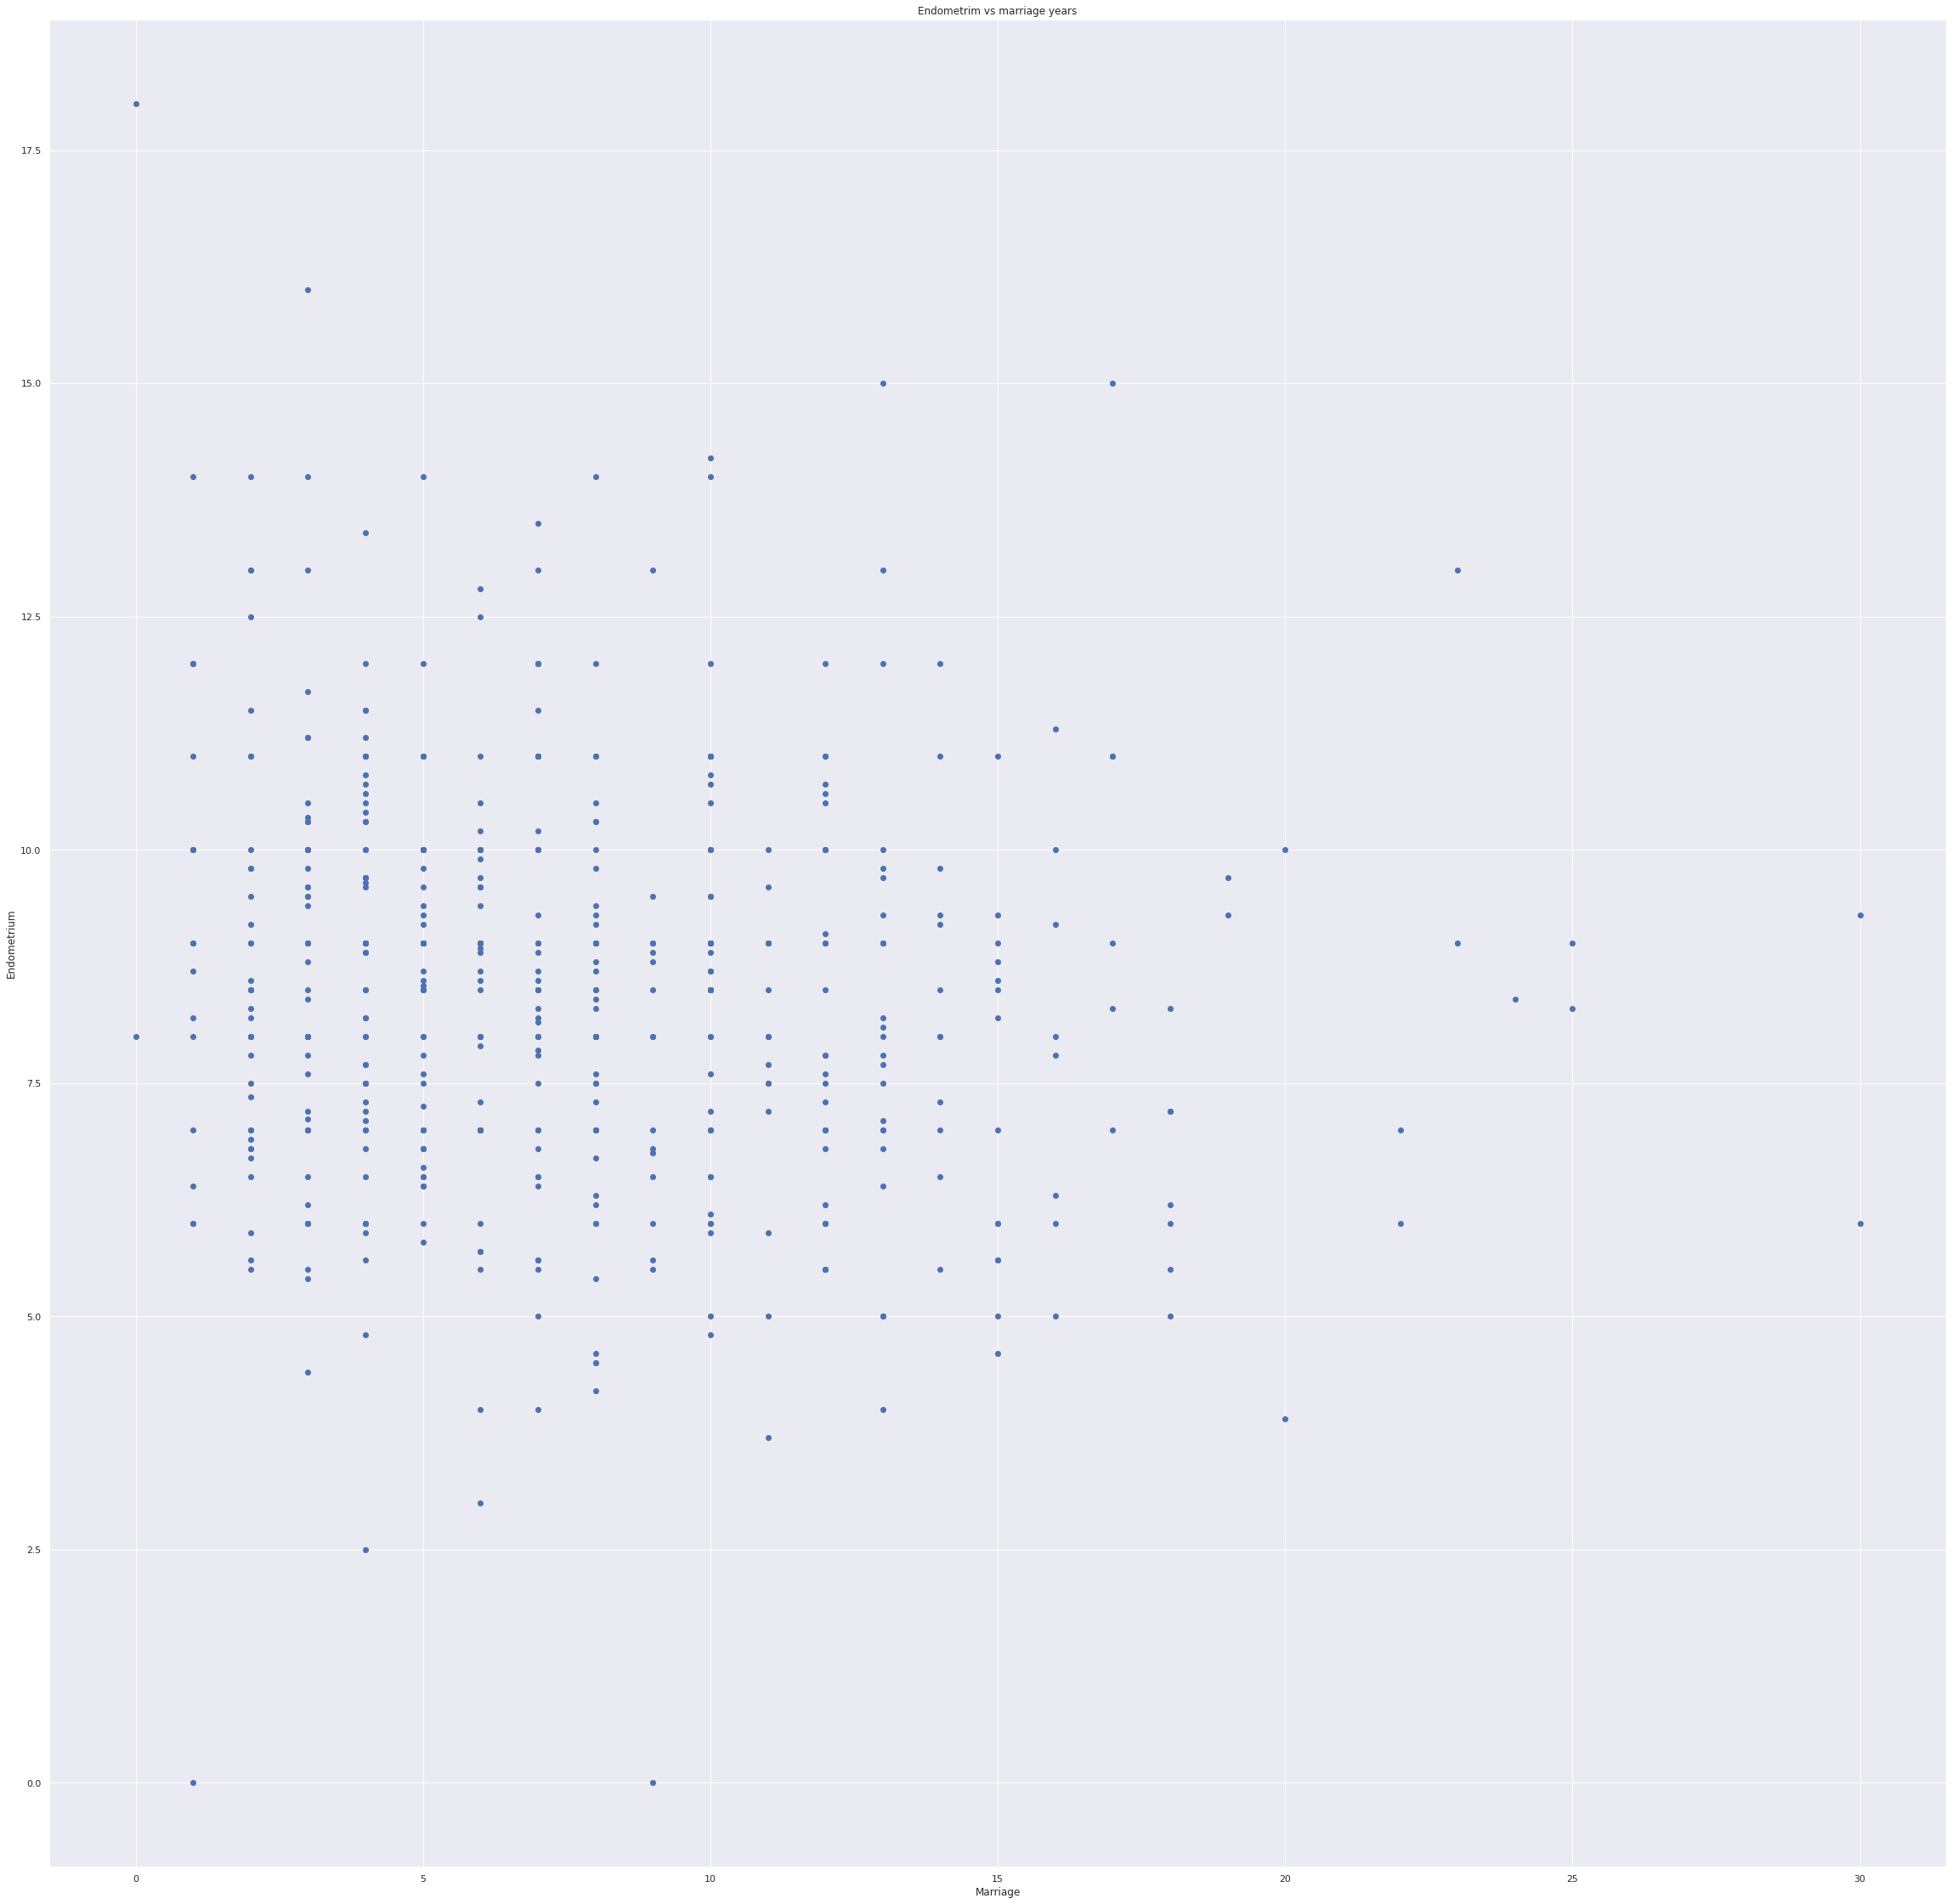

In [ ]:
ax = plt.axes()
ax.scatter(df['Marraige Status (Yrs)'], df['Endometrium (mm)'])
ax.set(xlabel="Marriage", ylabel="Endometrium", title='Endometrim vs marriage years')

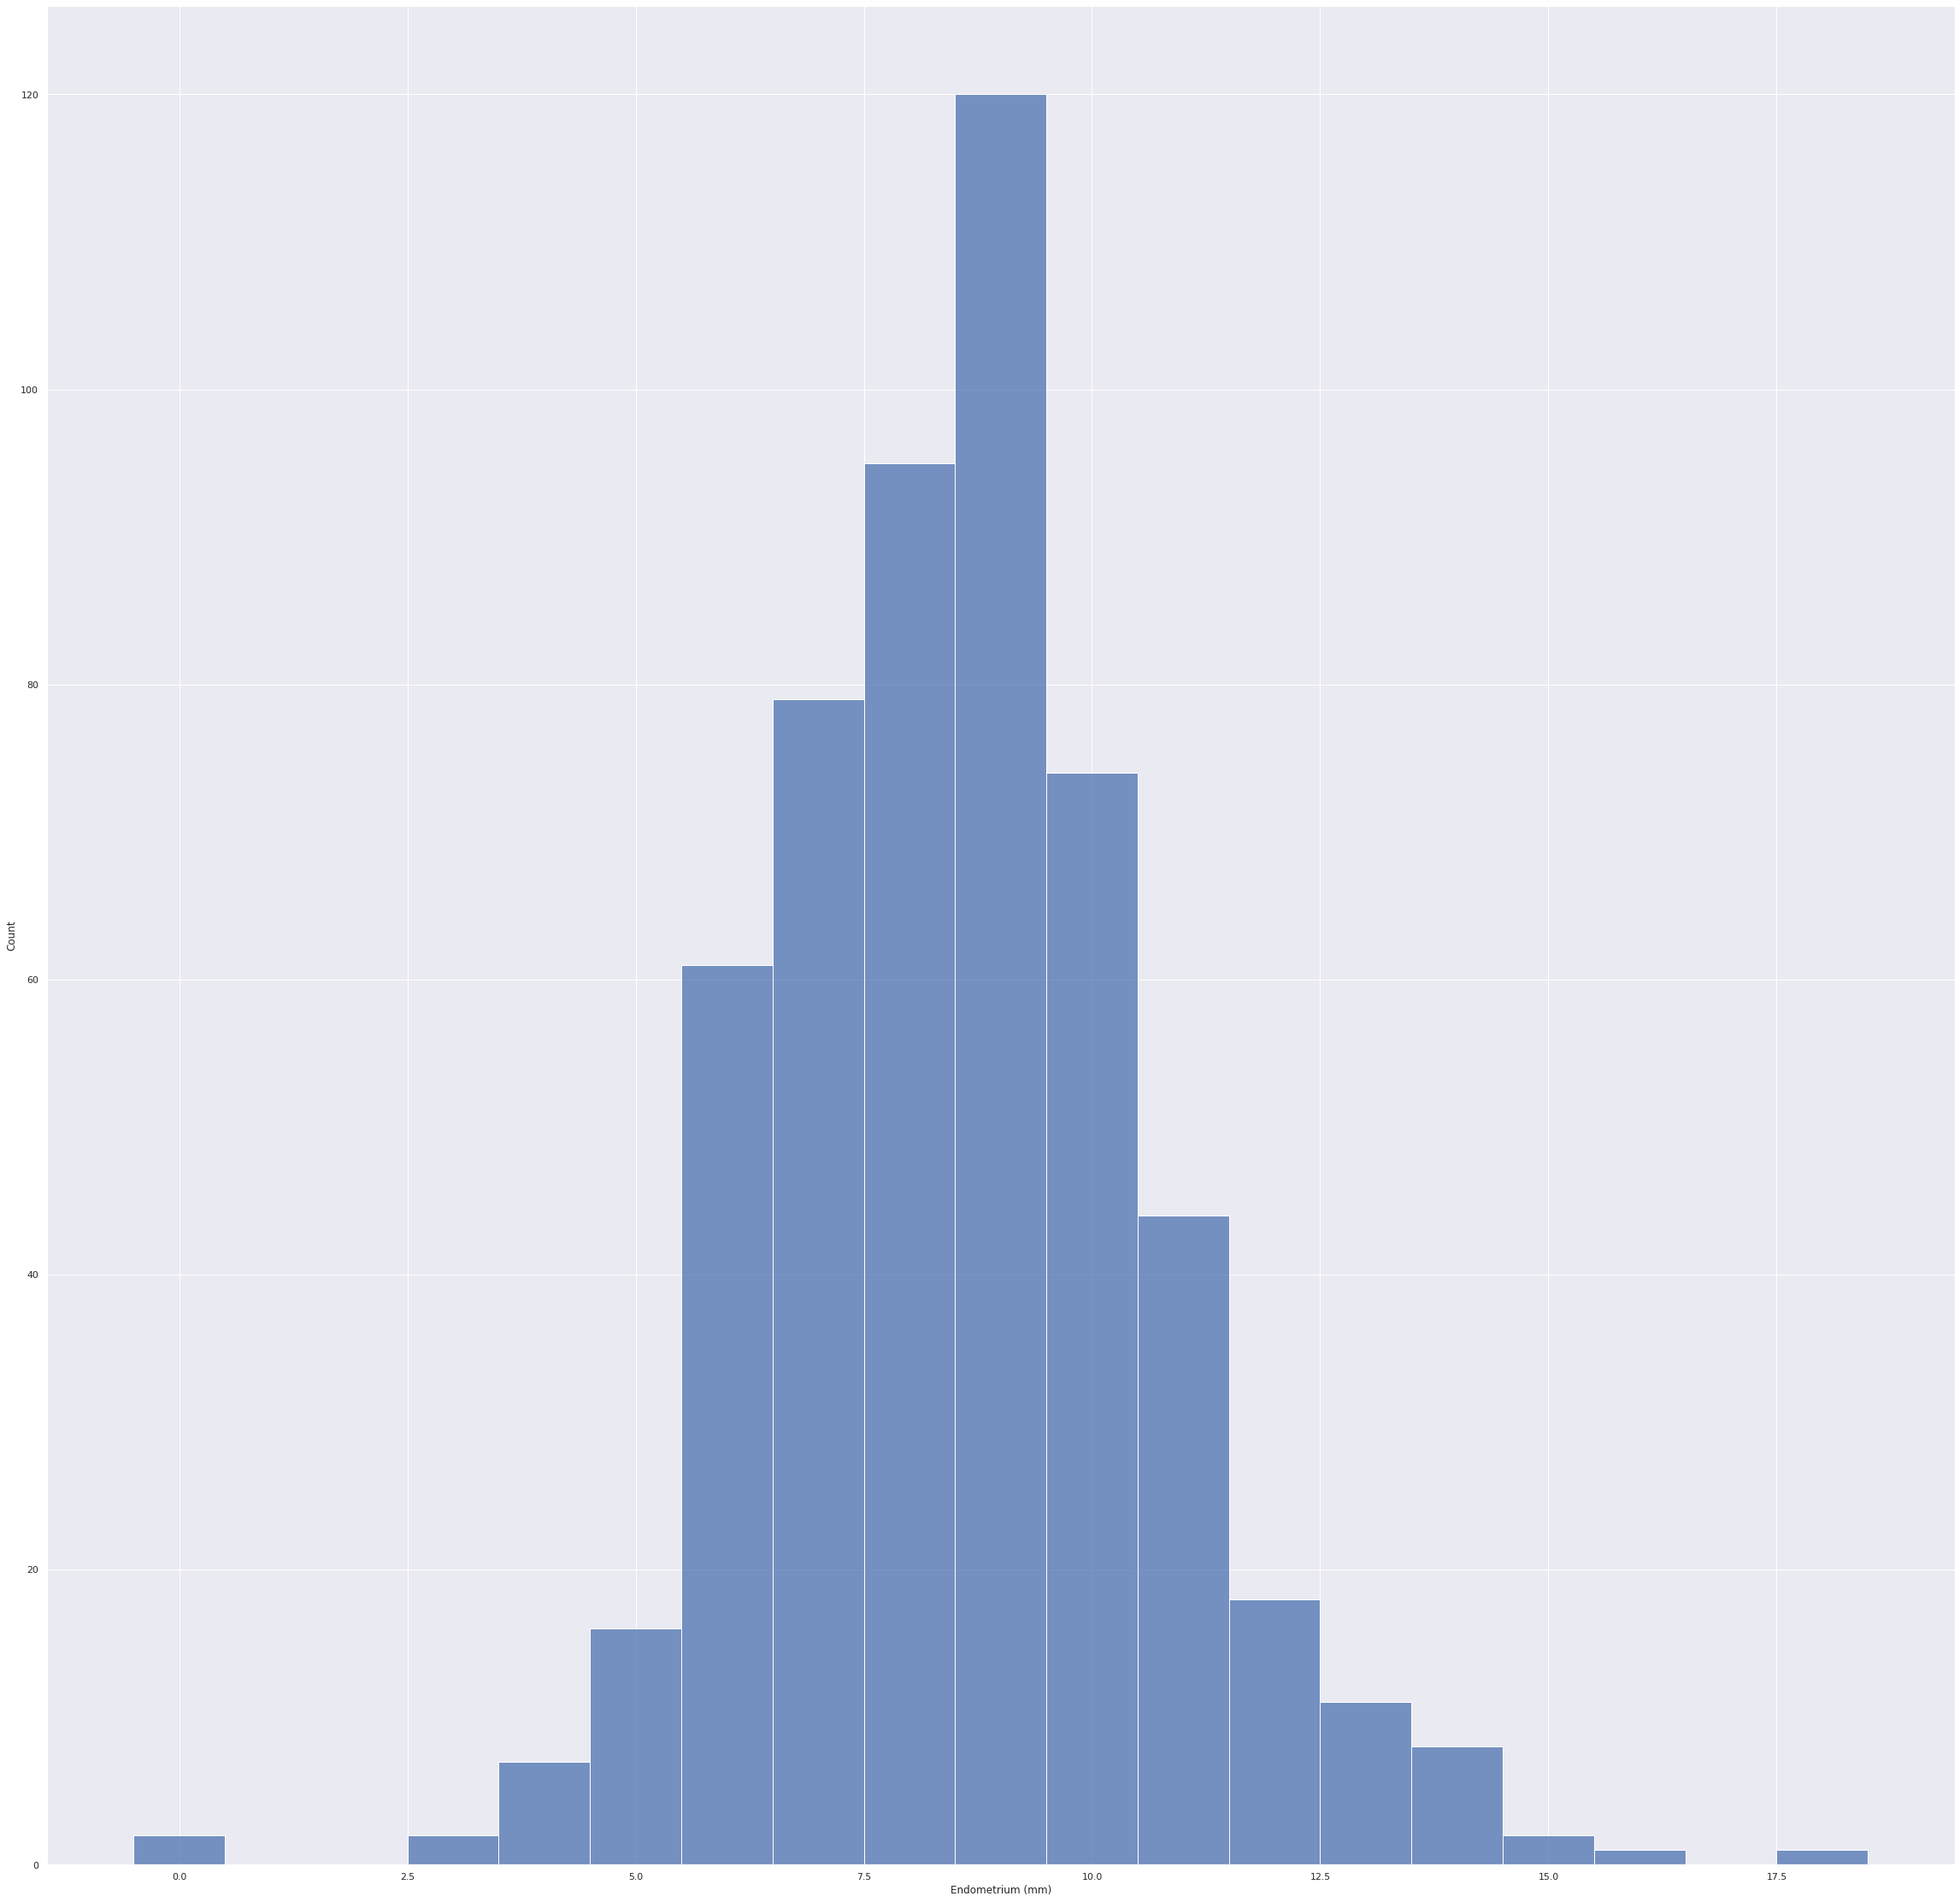

In [ ]:
# ax = plt.axes()
# ax.hist(df['Endometrium (mm)'], bins=25);
# ax.set(xlabel="Endom", ylabel="Frequency", title='Distribution of marriage years')
sns.histplot(df['Endometrium (mm)'], discrete=True)

Text(0.5, 0, 'xlabel')

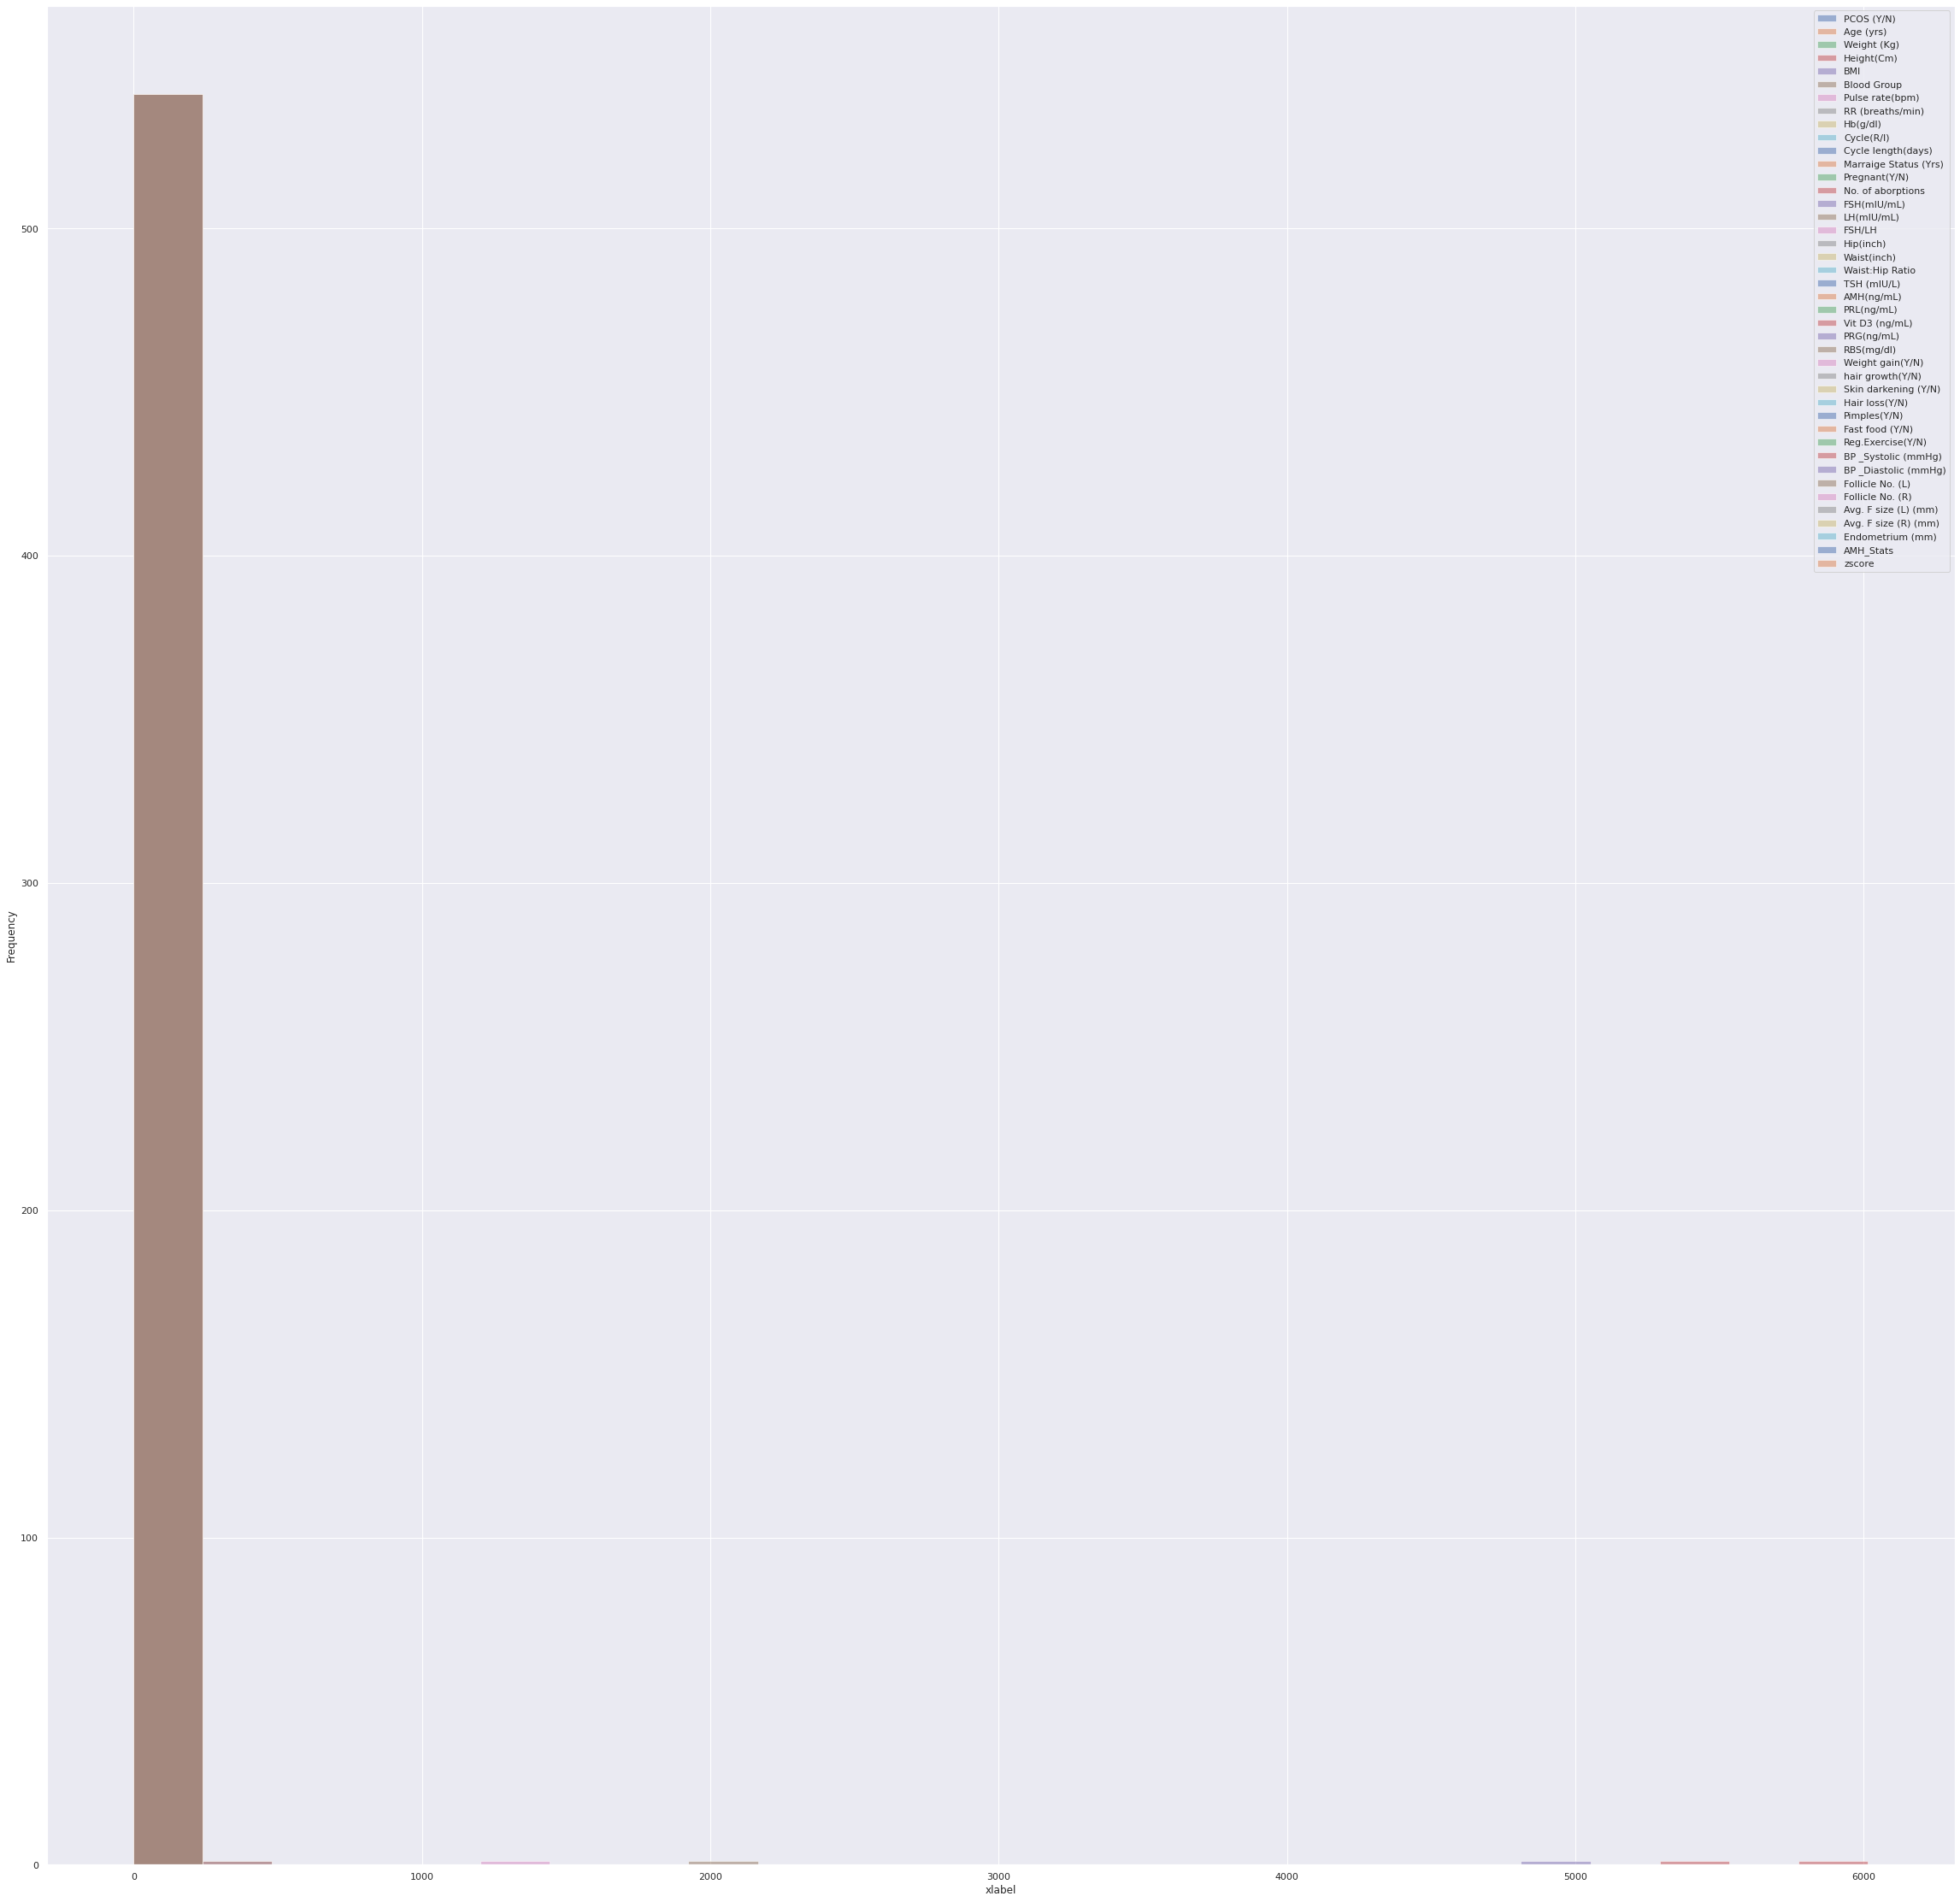

In [ ]:
sns.set_context('notebook')
ax=df.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('xlabel')

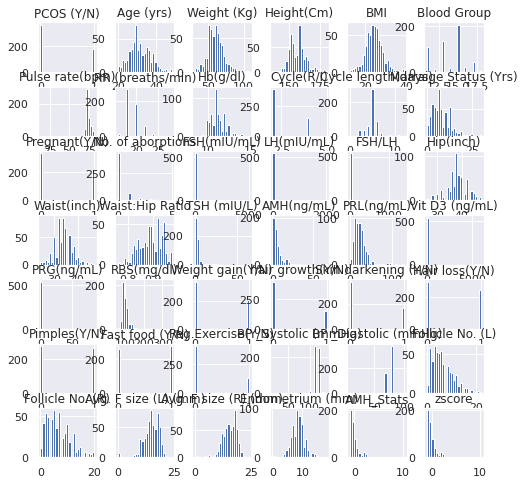

In [ ]:
axList = df.hist(bins=25, figsize=(8,8) )

In [ ]:
df = df.dropna()


In [ ]:
# Standarization
df = (df-df.mean())/df.std()
df.head()

,AMH(ng/mL),AMH_Stats,Age (yrs),Avg. F size (L) (mm),Avg. F size (R) (mm),BMI,BP _Diastolic (mmHg),BP _Systolic (mmHg),Blood Group,Cycle length(days),Cycle(R/I),Endometrium (mm),FSH(mIU/mL),FSH/LH,Fast food (Y/N),Follicle No. (L),Follicle No. (R),Hair loss(Y/N),Hb(g/dl),Height(Cm),Hip(inch),LH(mIU/mL),Marraige Status (Yrs),No. of aborptions,PCOS (Y/N),PCOS (Y/N)_val,PRG(ng/mL),PRL(ng/mL),Pimples(Y/N),Pregnant(Y/N),Pulse rate(bpm),RBS(mg/dl),RR (breaths/min),Reg.Exercise(Y/N),Skin darkening (Y/N),TSH (mIU/L),Vit D3 (ng/mL),Waist(inch),Waist:Hip Ratio,Weight (Kg),Weight gain(Y/N),hair growth(Y/N),zscore
0,-0.604184,-0.604184,-0.634020,0.836002,0.767826,-1.235402,0.551135,-0.631282,0.650681,0.039644,-0.620959,0.011123,-0.030650,-0.078174,0.971748,-0.739932,-0.820711,-0.908940,-0.784443,-0.743317,-0.502179,-0.032189,-0.132718,-0.416352,-0.696681,NaN,-0.010750,1.391981,-0.978964,-0.783447,1.072687,-0.422207,1.632097,-0.573262,-0.664717,-0.612771,-0.094787,-1.067876,-1.264121,-1.363508,-0.777317,-0.613102,-0.604184
1,-0.696072,-0.696072,0.844449,-0.005079,-0.437411,0.150350,-1.242873,0.722896,0.650681,0.039644,-0.620959,-2.205577,-0.036272,-0.012037,-1.027171,-0.739932,-0.369945,-0.908940,0.622863,0.831214,0.001863,-0.062071,0.694952,-0.416352,-0.696681,NaN,0.094269,-0.282658,-0.978964,1.274052,0.169811,-0.422207,0.447705,-0.573262,-0.664717,0.047588,0.032882,-0.511840,-1.074767,0.486281,-0.777317,-0.613102,-0.696072
2,0.171756,0.171756,0.290023,0.836002,1.370445,0.236566,0.551135,0.722896,-1.522273,0.039644,-0.620959,0.703841,-0.041755,-0.010041,0.971748,1.624529,1.883886,1.098148,0.738216,1.411304,0.505906,-0.064494,0.488035,-0.416352,1.432723,NaN,-0.065885,-0.921920,1.019600,1.274052,-0.281627,-0.853257,-0.736688,-0.573262,-0.664717,-0.117502,-0.000624,0.600230,0.174966,0.830849,-0.777317,-0.613102,0.171756
3,-0.748822,-0.748822,1.029257,-0.005079,-0.437411,1.322271,-1.242873,0.722896,-0.435796,0.039644,-0.620959,-0.450690,-0.030144,-0.057497,-1.027171,-0.976378,-1.046094,-0.908940,0.968922,-1.406277,1.009948,-0.047419,-0.753471,-0.416352,-0.696681,NaN,-0.065885,0.840225,-0.978964,-0.783447,-0.281627,-1.284308,0.447705,-0.573262,-0.664717,3.575717,-0.047705,0.600230,-0.750161,0.486281,-0.777317,-0.613102,-0.748822
4,-0.571853,-0.571853,-1.188445,0.275282,-0.437411,-1.047809,0.551135,0.722896,-1.522273,0.039644,-0.620959,-0.681596,-0.048944,-0.040905,-1.027171,-0.739932,-0.595328,1.098148,-1.338137,0.748344,-0.250158,-0.064263,-1.374224,-0.416352,-0.696681,NaN,-0.060634,0.385327,-0.978964,1.274052,-0.281627,-0.853257,-0.736688,-0.573262,-0.664717,0.156761,-0.017665,-1.067876,-1.750299,-0.692506,-0.777317,-0.613102,-0.571853


### Filtering by multiple conditions
There are many alternative ways to perform filtering in pandas. We can also use '|' ('or') and '&' (and) to select multiple columns and rows.

In [ ]:
cols_all_float = df.select_dtypes('float64').columns
cols_all = df.columns
print(len(cols_all) == len(cols_all_float) )

True


In [ ]:
num_cols = df.select_dtypes('number').columns
len(num_cols)

skew_vals = df.skew()
print(skew_vals)


AMH(ng/mL)                3.297014
AMH_Stats                 3.297014
Age (yrs)                 0.354004
Avg. F size (L) (mm)     -1.147341
Avg. F size (R) (mm)     -0.808139
BMI                       0.269115
BP _Diastolic (mmHg)     -3.884299
BP _Systolic (mmHg)      -4.845716
Blood Group              -0.132627
Cycle length(days)        0.826791
Cycle(R/I)                0.997662
Endometrium (mm)          0.258766
FSH(mIU/mL)              23.244530
FSH/LH                   21.463644
Fast food (Y/N)          -0.055629
Follicle No. (L)          0.944619
Follicle No. (R)          0.785224
Hair loss(Y/N)            0.189910
Hb(g/dl)                  0.744115
Height(Cm)                0.325193
Hip(inch)                -0.200873
LH(mIU/mL)               23.234664
Marraige Status (Yrs)     1.122095
No. of aborptions         2.970831
PCOS (Y/N)                0.738773
PCOS (Y/N)_val                 NaN
PRG(ng/mL)               20.730654
PRL(ng/mL)                2.441412
Pimples(Y/N)        

In [ ]:
mult_loc = df[df['Weight gain(Y/N)'] == 1]
mult_loc


,AMH(ng/mL),AMH_Stats,Age (yrs),Avg. F size (L) (mm),Avg. F size (R) (mm),BMI,BP _Diastolic (mmHg),BP _Systolic (mmHg),Blood Group,Cycle length(days),Cycle(R/I),Endometrium (mm),FSH(mIU/mL),FSH/LH,Fast food (Y/N),Follicle No. (L),Follicle No. (R),Hair loss(Y/N),Hb(g/dl),Height(Cm),Hip(inch),LH(mIU/mL),Marraige Status (Yrs),No. of aborptions,PCOS (Y/N),PCOS (Y/N)_val,PRG(ng/mL),PRL(ng/mL),Pimples(Y/N),Pregnant(Y/N),Pulse rate(bpm),RBS(mg/dl),RR (breaths/min),Reg.Exercise(Y/N),Skin darkening (Y/N),TSH (mIU/L),Vit D3 (ng/mL),Waist(inch),Waist:Hip Ratio,Weight (Kg),Weight gain(Y/N),hair growth(Y/N),zscore


In [ ]:
len(df['Height(Cm)'].unique())

50

<function matplotlib.pyplot.show>

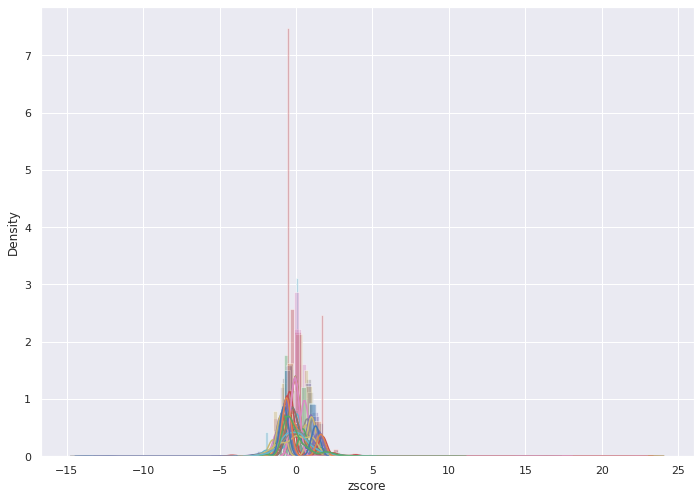

In [ ]:
for col in df.columns:
  sns.distplot(df[col])

plt.show

In [ ]:
all_skew_cols = df.skew

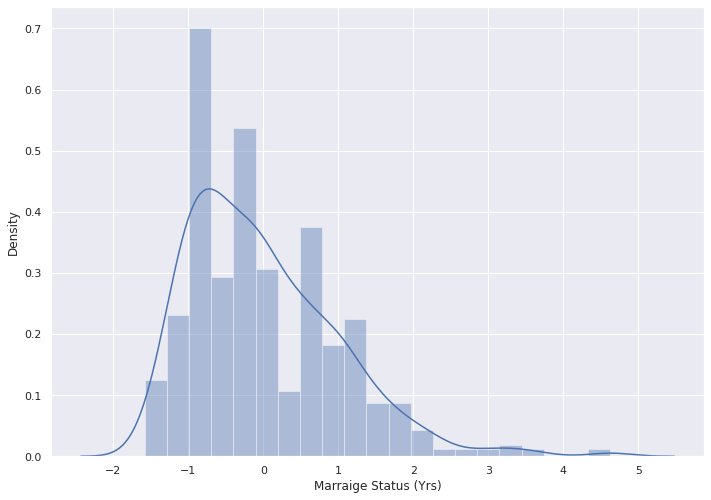

In [ ]:
df['Marraige Status (Yrs)'].skew()
sns.distplot(df['Marraige Status (Yrs)'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AMH(ng/mL)             541 non-null    float64
 1   AMH_Stats              541 non-null    float64
 2   Age (yrs)              541 non-null    float64
 3   Avg. F size (L) (mm)   541 non-null    float64
 4   Avg. F size (R) (mm)   541 non-null    float64
 5   BMI                    541 non-null    float64
 6   BP _Diastolic (mmHg)   541 non-null    float64
 7   BP _Systolic (mmHg)    541 non-null    float64
 8   Blood Group            541 non-null    float64
 9   Cycle length(days)     541 non-null    float64
 10  Cycle(R/I)             541 non-null    float64
 11  Endometrium (mm)       541 non-null    float64
 12  FSH(mIU/mL)            541 non-null    float64
 13  FSH/LH                 541 non-null    float64
 14  Fast food (Y/N)        541 non-null    float64
 15  Follic

In [ ]:
x = df.drop('PCOS (Y/N)',1)
y = df['PCOS (Y/N)']



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print("""
x_train: {}
x_test:  {}
y_train: {}
y_test:  {}
""".format(len(x_train), len(x_test), len(y_train), len(y_test)))
# asd = df_mic.drop('PCOS (Y/N)')
# print(df_mic.drop('PCOS (Y/N)',1))


x_train: 362
x_test:  179
y_train: 362
y_test:  179



In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
models = {}
def train_validate_predict(regressor, x_train, y_train, x_test, y_test, index):
    model = regressor
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    models[index] = r2

In [ ]:
# count = np.isnan(df).values.sum()
# print(count)

# np.any(np.isnan(df))


# np.all(np.isfinite(df))


# df.replace([np.inf, -np.inf], np.nan, inplace=True)


# np.where(np.isnan(df))
df.replace({-np.inf: -1_000_000, np.inf: 1_000_000}, inplace=True)
# np.where(np.isnan(df))
# x_train, x_test, y_train, y_test

In [ ]:
model_list = [LinearRegression, Lasso, Ridge, BayesianRidge, DecisionTreeRegressor, LinearSVR, KNeighborsRegressor,
              RandomForestRegressor]
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Bayesian Ridge', 'Decision Tree Regressor', 'Linear SVR', 
               'KNeighbors Regressor', 'Random Forest Regressor']

index = 0
for regressor in model_list:
    train_validate_predict(regressor(), x_train, y_train, x_test, y_test, model_names[index])
    index+=1

ValueError: ignored

In [ ]:
models

In [ ]:
model = KNeighborsRegressor()
model.fit(x_train, y_train)
    
y_pred = model.predict(x_test)
preds = pd.DataFrame({'y_pred': y_pred, 'y_test':y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred')
plt.plot(preds['y_test'], label='actual')
plt.legend()
plt.show()